<h1><center>Data Exploration</h1>

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from scipy.stats import shapiro, spearmanr, kendalltau
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import chi2_contingency
import statsmodels.api as sm

import pandas as pd
import numpy as np

from datetime import datetime

In [236]:
df=pd.read_csv('../csv/dataset_final.csv',index_col=0)

## Analyse préliminaire

In [237]:
# Nous avons 780 lignes et 39 colonnes
df.shape

(780, 38)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 3983113025 to 3981429264
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   modele                        780 non-null    object 
 1   size                          780 non-null    float64
 2   brand                         780 non-null    object 
 3   price                         780 non-null    float64
 4   price_decimal                 780 non-null    object 
 5   ressell_price                 780 non-null    int64  
 6   promoted                      780 non-null    bool   
 7   identic_title_description     780 non-null    object 
 8   short_description             780 non-null    object 
 9   secure_description            780 non-null    object 
 10  has_emoji_description         780 non-null    object 
 11  other_campus_dressing         780 non-null    float64
 12  other_campus_dressing_count   780 non-null    int64  

In [239]:
#Taux de Na pour chaque variable
# deux variables avec des Na gender et city
(df.isna().sum()/len(df))*100

modele                           0.000000
size                             0.000000
brand                            0.000000
price                            0.000000
price_decimal                    0.000000
ressell_price                    0.000000
promoted                         0.000000
identic_title_description        0.000000
short_description                0.000000
secure_description               0.000000
has_emoji_description            0.000000
other_campus_dressing            0.000000
other_campus_dressing_count      0.000000
hype_products_dressing           0.000000
hype_products_dressing_count     0.000000
other_campus_sell                0.000000
other_campus_sell_count          0.000000
hype_products_sell               0.000000
hype_products_sell_count         0.000000
description_user                 0.000000
sell_sneaker_account             0.000000
item_count                       0.000000
total_items_count                0.000000
given_item_count                 0

In [240]:
nb_doublons = df.duplicated().sum()
print("Nombre de doublons :", nb_doublons)

Nombre de doublons : 25


## Exploration des variables

#### Pour chaque Variable:
- Info
- Taux de Na
- Valeurs et Nombre de valeurs distinctes
- Étendue des valeurs, Équilibre
- Graphique en barres pour la fréquence de chaque catégorie 
- Distribution normale ou non pour les variables quantitatives (test Shapiro)

| Nom de la variable | Description | Nom de la varaible | Description                           |
| ------------------ | --------------- | ----------------- | ------------------------------------- |
| id_advert          | id annonce             | description_user                 | l'annonceur possède une description          |
| modele          | nom du modele de campus             | sell_sneaker_account            | compte de revente de produits hype         |
| size          | taille de la paire          | item_count              | nombre de produits dans le dressing de l'annonceur          |
| brand                | marque de la paire            | total_items_count               | nombre total de produits dans le dressing de l'annonceur depuis sa création                                  |
| price           | prix demandé par l'annonceur            | given_item_count                | nombre total de produits vendus          |
| price _decimal          | le prix comporte-t-il des chiffres décimals douteux             | taken_item_count           | nombre total de produits achetés         |
| ressell_price         | prix du marché           | feedback_reputation               | moyenne des notes de l'annonceur          |
| promoted                | annnonce mise en avant (boostée)             | followers_count                 | nombre de personnes qui suivent l'annonceur                                   |
| identic_title_description          |  titre et description de l'annonce identiques            | following_count                 | nombre de personnes que suit l'annonceur         |
| short_description          | description courte            | gender           | genre de l'annonceur         |
| secure_description           | description qui semble secure          | photo             | présence photo de profil annonceur         |
| has_emoji_description                | description contient des emojis       | is_publish_photos_agreed               | photot de profil acceptée                                  |
| other_campus_dressing         | pourcentage d'autres campus dans le dressing de l'annonceur             | expose_location                 | annonceur accepte de montrer sa localisation    |
| other_campus_dressing_count          | nombre d'autres campus dans le dressing de l'annonceur              | city            | ville de publication de l'annonce           |
| hype_products_dressing         | pourcentage de produits hype dans le dressing de l'annonceur           | country_title              | pays de publication de l'annonce          |
| hype_products_dressing_count               | nombre de produits hype dans le dressing de l'annonceur  |       verification_facebook              | compte vérifié par facebook                                 |
| other_campus_sell           | pourcentage d'autres campus vendues par l'annonceur              | verification_google               | compte vérifié par compte google          |
| other_campus_sell_count          | nombre d'autres campus vendues par l'annonceur             | verification_phone          | compte vérifié par téléphone          |
| hype_products_sell          | pourcentage de produits hype vendues par l'annonceur           | scam            | Variable cible: annonce frauduleuse          |
| hype_products_sell_count               | nombre de produits hype vendues par l'annonceur           |  ...             |     ...                           |


### Variables explicatives

### Variable cible: Scam

In [241]:
df['scam'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: scam
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [242]:
# Valeurs et Nombre de valeurs distinctes
print(df["scam"].unique())
df["scam"].nunique()

[1 0]


2

In [243]:
# Étendue des valeurs, Équilibre
df["scam"].value_counts()

scam
1    443
0    337
Name: count, dtype: int64

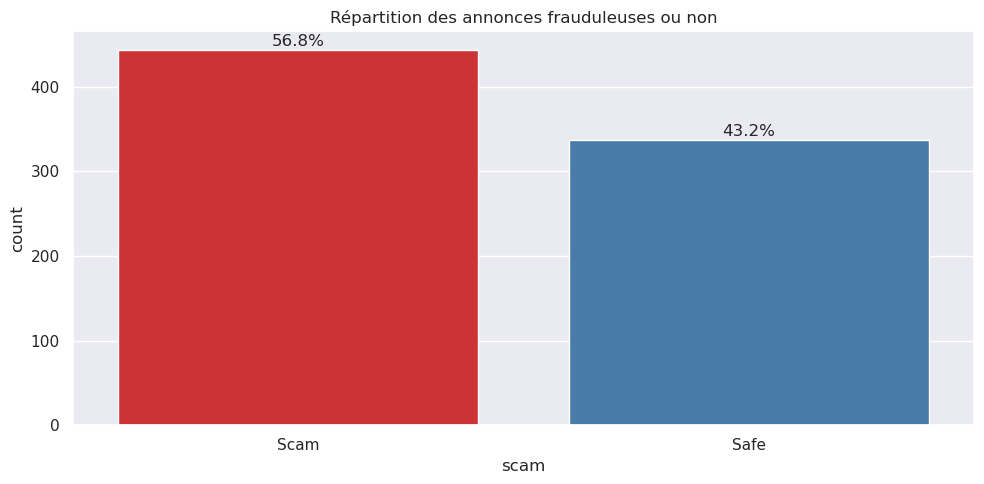

In [244]:
df['scam'] = df['scam'].replace({0: 'Safe', 1: 'Scam'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="scam", data=df, palette='Set1', hue='scam', legend=False)  
plt.title("Répartition des annonces frauduleuses ou non")

total = len(df["scam"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

In [245]:
df['scam'] = df['scam'].replace({'Safe':0,'Scam': 1})

#### Variables qualitatives

##### Modele

In [246]:
df['modele'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: modele
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [247]:
# Taux de na
(df["modele"].isna().sum())/(len(df.index))

0.0

In [248]:
# Valeurs et Nombre de valeurs distinctes
print(df["modele"].unique())
df["modele"].nunique()

['black' 'grey' 'green' 'crystal' 'pink' 'blue' 'red' 'brown' 'orange'
 'beige' 'light_pink' 'black_korn' 'green_black' 'green_yellow'
 'brown_black' 'yellow' 'purple']


17

In [249]:
# Étendue des valeurs, Équilibre
df["modele"].value_counts()

modele
black           343
grey            292
green            47
crystal          25
blue             24
pink             13
red              11
beige             8
orange            5
purple            3
brown             2
yellow            2
light_pink        1
green_black       1
black_korn        1
brown_black       1
green_yellow      1
Name: count, dtype: int64

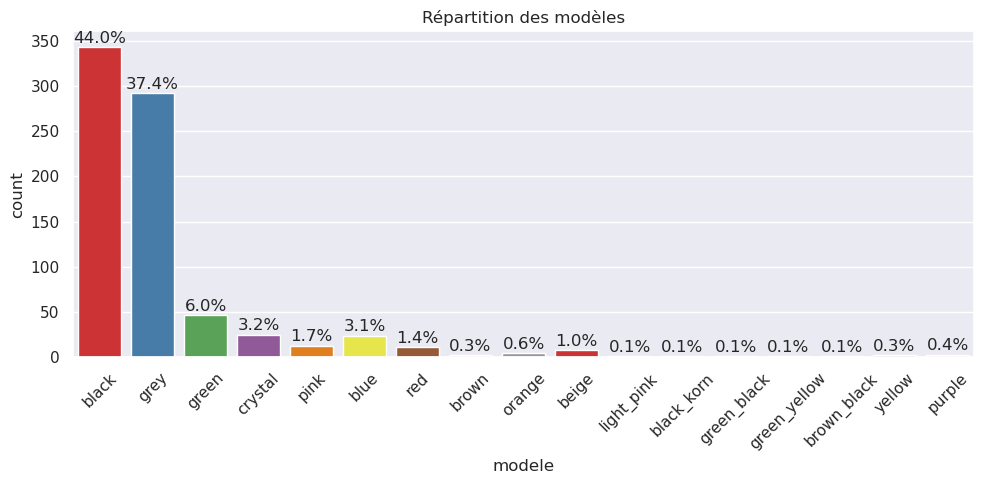

In [250]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="modele", data=df, palette='Set1', hue='modele', legend=False)  
plt.title("Répartition des modèles")

total = len(df["modele"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

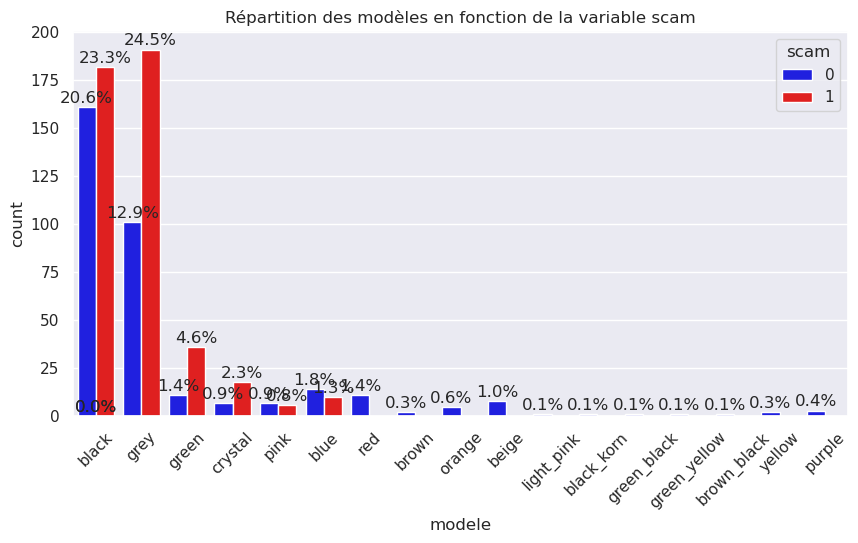

In [251]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="modele", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des modèles en fonction de la variable scam")

total = len(df["modele"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.show()


##### Brand

In [252]:
df['brand'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: brand
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [253]:
# Taux de na
(df["brand"].isna().sum())/(len(df.index))

0.0

In [254]:
# Valeurs et Nombre de valeurs distinctes
print(df["brand"].unique())
df["brand"].nunique()

['adidas Superstar' 'adidas Originals' 'adidas' 'Dynam' 'Campus'
 'Dynam Baskets']


6

In [255]:
# Étendue des valeurs, Équilibre
df["brand"].value_counts()

brand
adidas              490
adidas Superstar    186
adidas Originals     76
Campus               25
Dynam                 2
Dynam Baskets         1
Name: count, dtype: int64

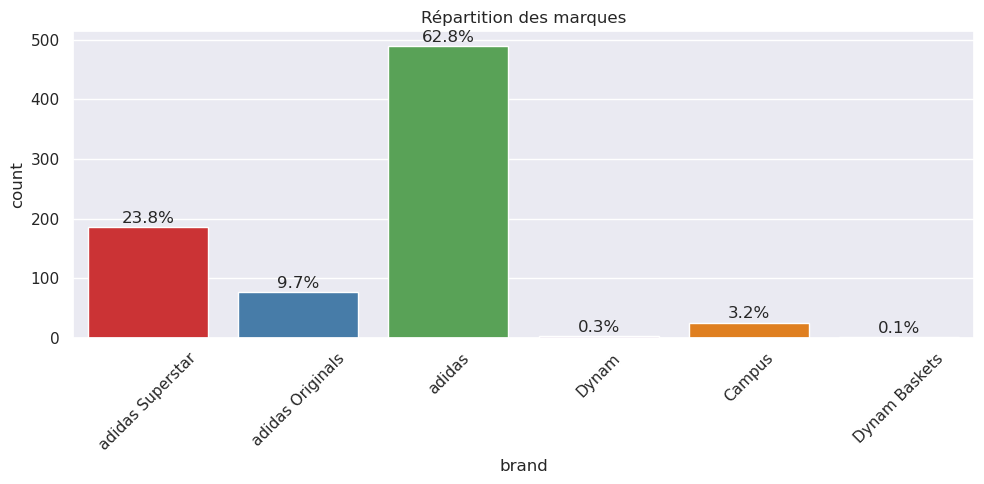

In [256]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="brand", data=df, palette='Set1', hue='brand', legend=False)  
plt.title("Répartition des marques")

total = len(df["brand"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

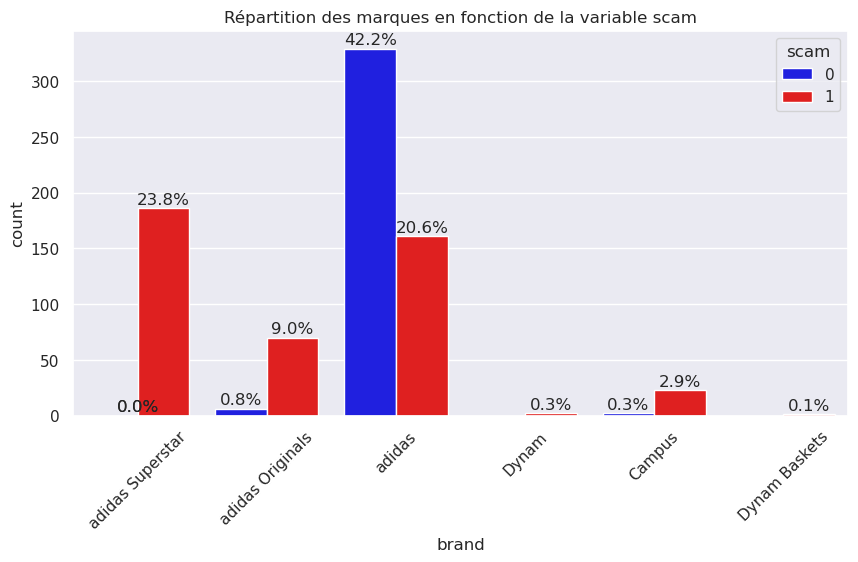

In [257]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="brand", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des marques en fonction de la variable scam")

total = len(df["brand"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.xticks(rotation=45)
plt.show()

##### Promoted


In [258]:
df['promoted'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: promoted
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [259]:
# Taux de na
(df["promoted"].isna().sum())/(len(df.index))

0.0

In [260]:
# Valeurs et Nombre de valeurs distinctes
print(df["promoted"].unique())
df["promoted"].nunique()


[False  True]


2

In [261]:
# Étendue des valeurs, Équilibre
df["promoted"].value_counts()

promoted
False    771
True       9
Name: count, dtype: int64

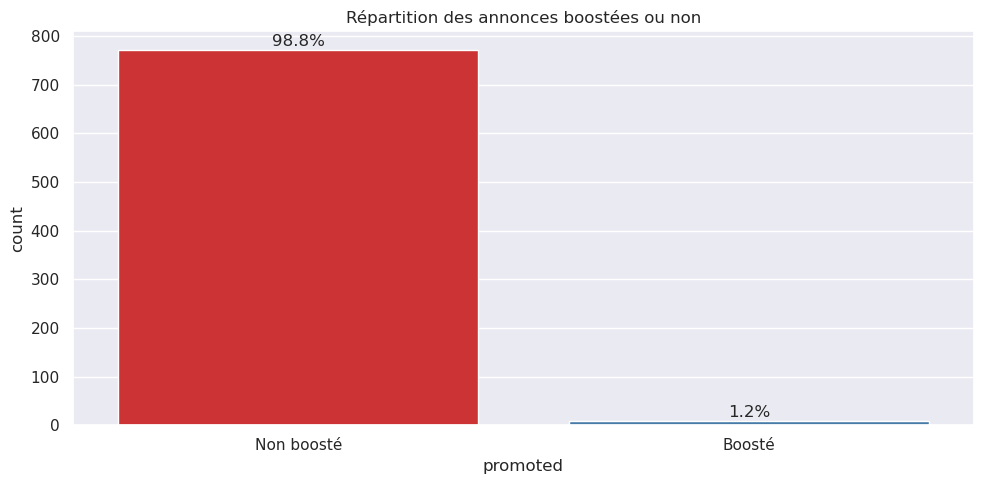

In [262]:
df['promoted'] = df['promoted'].replace({False: 'Non boosté', True: 'Boosté'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="promoted", data=df, palette='Set1', hue='promoted', legend=False)  
plt.title("Répartition des annonces boostées ou non")

total = len(df["promoted"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

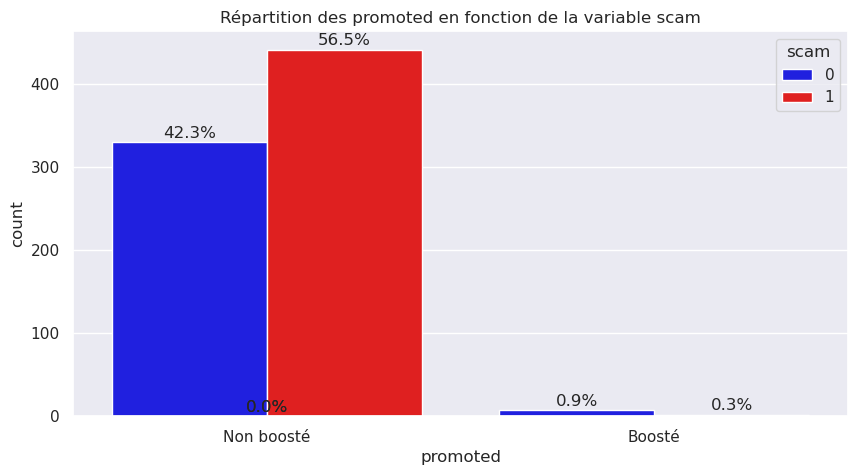

In [263]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="promoted", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des promoted en fonction de la variable scam")

total = len(df["promoted"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

##### Identic title description

In [264]:
df['identic_title_description'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: identic_title_description
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [265]:
# Taux de na
(df["identic_title_description"].isna().sum())/(len(df.index))

0.0

In [266]:
# Valeurs et Nombre de valeurs distinctes
print(df["identic_title_description"].unique())
df["identic_title_description"].nunique()

['Different' 'Identic']


2

In [267]:
# Étendue des valeurs, Équilibre
df["identic_title_description"].value_counts()

identic_title_description
Different    619
Identic      161
Name: count, dtype: int64

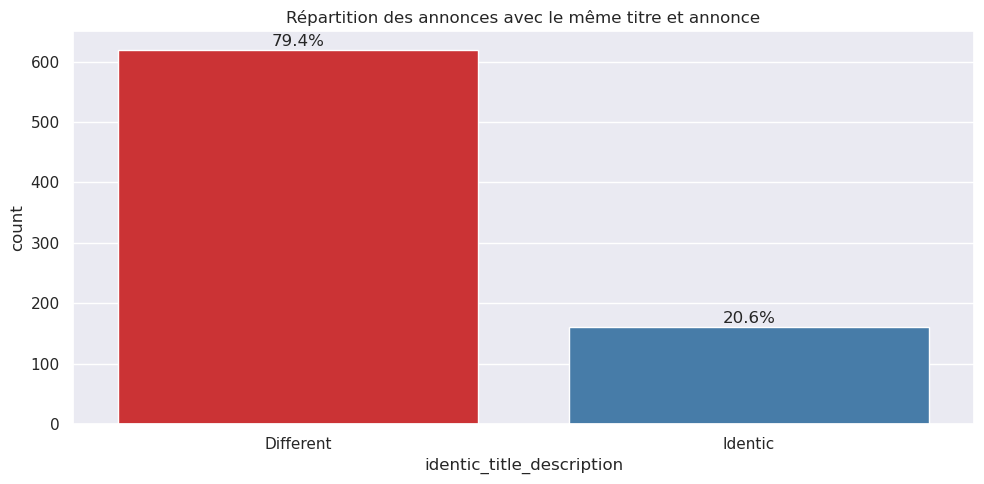

In [268]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="identic_title_description", data=df, palette='Set1', hue='identic_title_description', legend=False)  
plt.title("Répartition des annonces avec le même titre et annonce")

total = len(df["identic_title_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

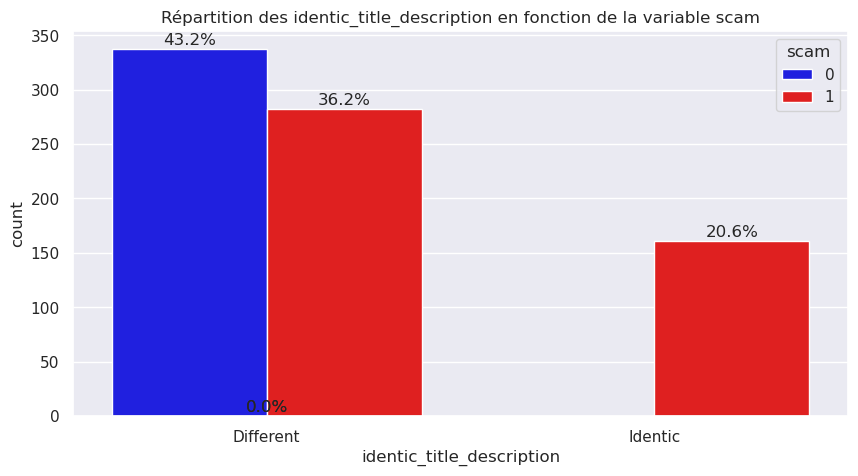

In [269]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="identic_title_description", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des identic_title_description en fonction de la variable scam")

total = len(df["identic_title_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [270]:
t=df[df['identic_title_description']=='Identic']

In [271]:
f=t[t['scam']==0]

In [272]:
f.head()

,modele,size,brand,price,price_decimal,ressell_price,promoted,identic_title_description,short_description,secure_description,...,gender,photo,is_publish_photos_agreed,expose_location,city,country_title,verification_facebook,verification_google,verification_phone,scam
id_advert,,,,,,,,,,,,,,,,,,,,,


##### description_user

In [273]:
df['description_user'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: description_user
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [274]:
# Taux de na
(df["description_user"].isna().sum())/(len(df.index))

0.0

In [275]:
# Valeurs et Nombre de valeurs distinctes
print(df["description_user"].unique())
df["description_user"].nunique()


['Present' 'No present']


2

In [276]:
# Étendue des valeurs, Équilibre
df["description_user"].value_counts()

description_user
Present       590
No present    190
Name: count, dtype: int64

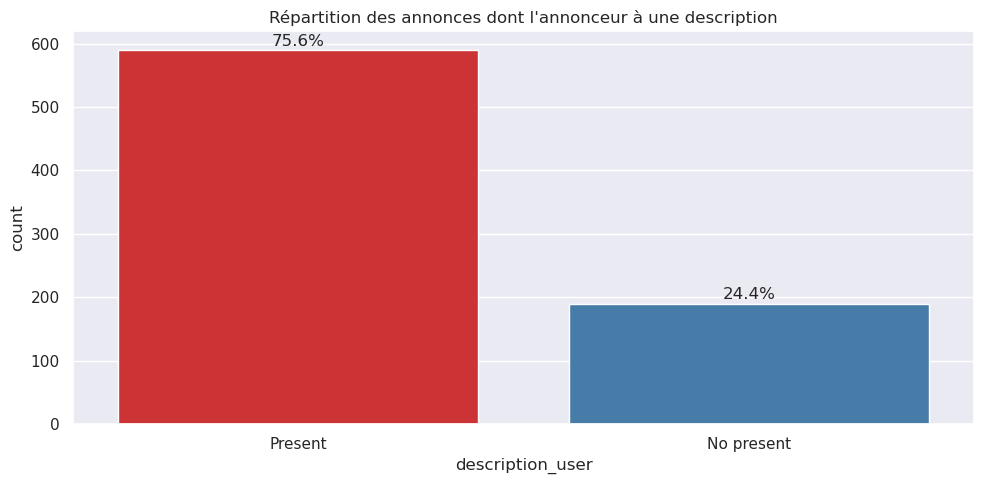

In [277]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="description_user", data=df, palette='Set1', hue='description_user', legend=False)  
plt.title("Répartition des annonces dont l'annonceur à une description")

total = len(df["description_user"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


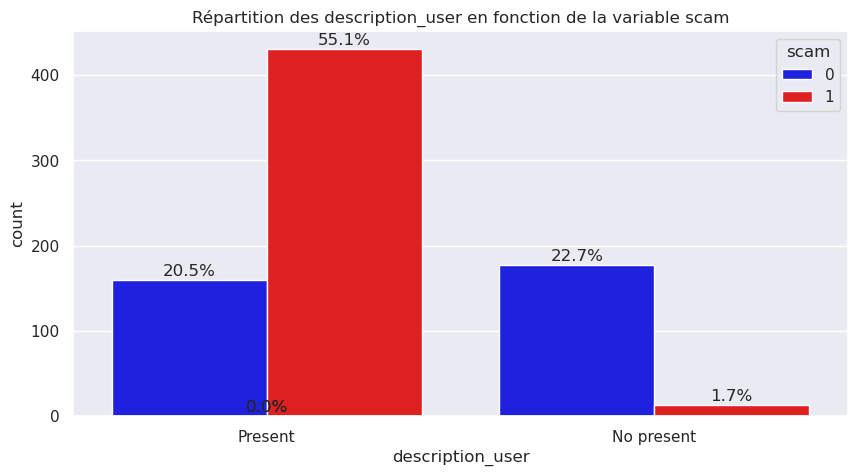

In [278]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="description_user", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des description_user en fonction de la variable scam")

total = len(df["description_user"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Sell_sneaker_account

In [279]:
df['sell_sneaker_account'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: sell_sneaker_account
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [280]:
# Taux de na
(df["sell_sneaker_account"].isna().sum())/(len(df.index))

0.0

In [281]:
# Valeurs et Nombre de valeurs distinctes
print(df["sell_sneaker_account"].unique())
df["sell_sneaker_account"].nunique()

['Simple Account' 'Ressell Account']


2

In [282]:
# Étendue des valeurs, Équilibre
df["sell_sneaker_account"].value_counts()

sell_sneaker_account
Simple Account     710
Ressell Account     70
Name: count, dtype: int64

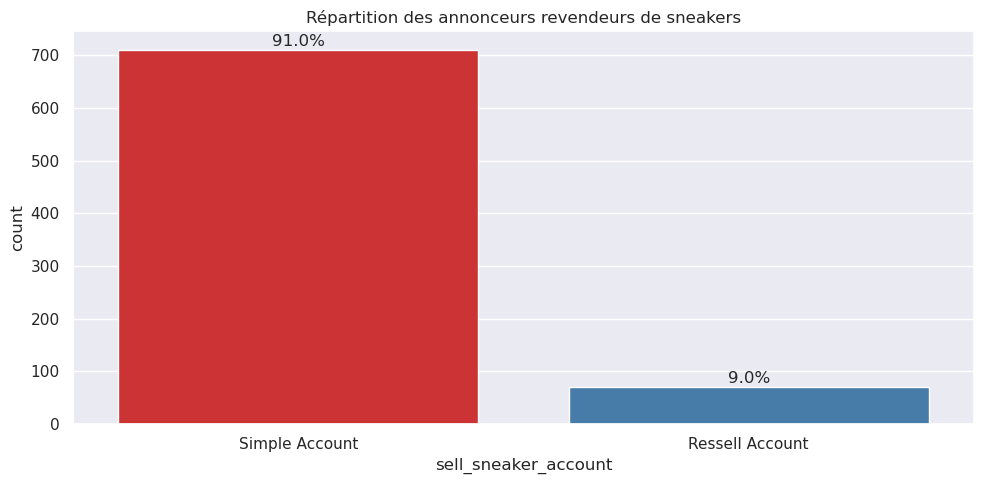

In [283]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="sell_sneaker_account", data=df, palette='Set1', hue='sell_sneaker_account', legend=False)  
plt.title("Répartition des annonceurs revendeurs de sneakers")

total = len(df["sell_sneaker_account"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


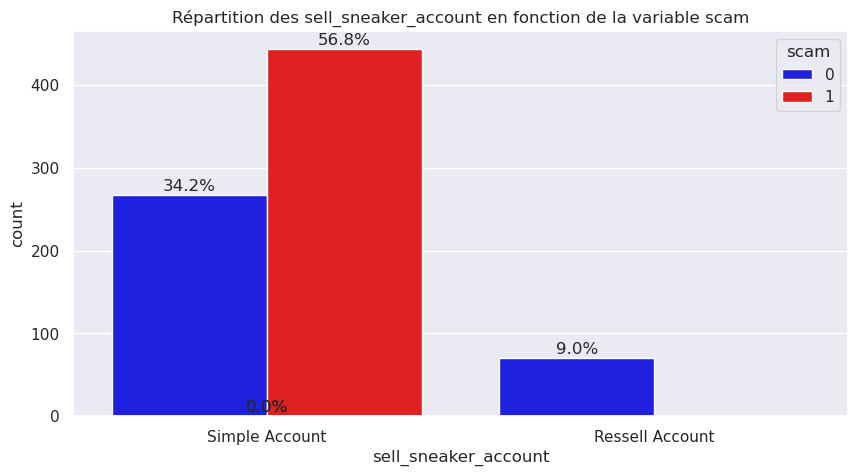

In [284]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="sell_sneaker_account", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des sell_sneaker_account en fonction de la variable scam")

total = len(df["sell_sneaker_account"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Short description

In [285]:
df['short_description'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: short_description
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [286]:
# Taux de na
(df["sell_sneaker_account"].isna().sum())/(len(df.index))

0.0

In [287]:
# Valeurs et Nombre de valeurs distinctes
print(df["sell_sneaker_account"].unique())
df["sell_sneaker_account"].nunique()


['Simple Account' 'Ressell Account']


2

In [288]:
 # Étendue des valeurs, Équilibre
df["sell_sneaker_account"].value_counts()

sell_sneaker_account
Simple Account     710
Ressell Account     70
Name: count, dtype: int64

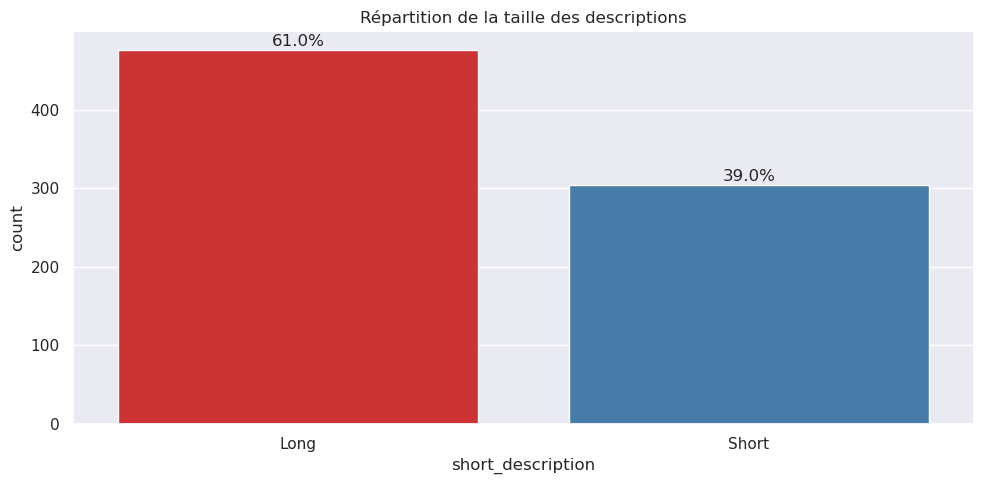

In [289]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="short_description", data=df, palette='Set1', hue='short_description', legend=False)  
plt.title("Répartition de la taille des descriptions")

total = len(df["short_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


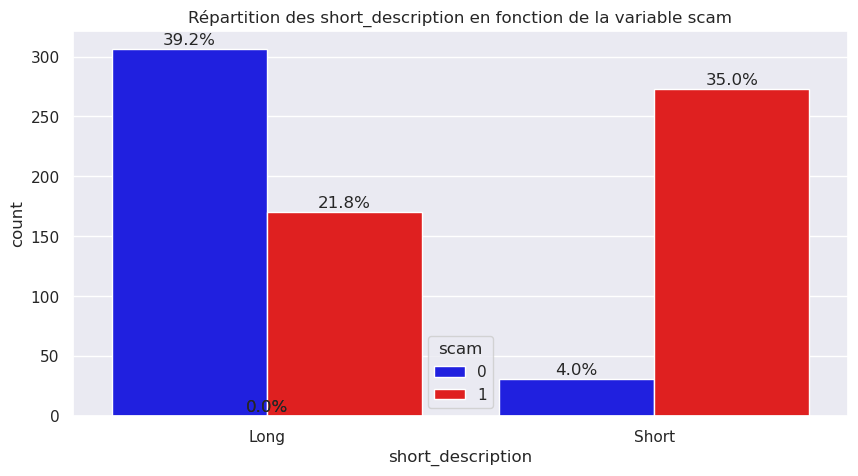

In [290]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="short_description", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des short_description en fonction de la variable scam")

total = len(df["short_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Secure Description

In [291]:
df['secure_description'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: secure_description
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [292]:
# Taux de na
(df["secure_description"].isna().sum())/(len(df.index))

0.0

In [293]:
# Valeurs et Nombre de valeurs distinctes
print(df["secure_description"].unique())
df["secure_description"].nunique()

['No Safe' 'Safe']


2

In [294]:
# Étendue des valeurs, Équilibre
df["secure_description"].value_counts()

secure_description
No Safe    576
Safe       204
Name: count, dtype: int64

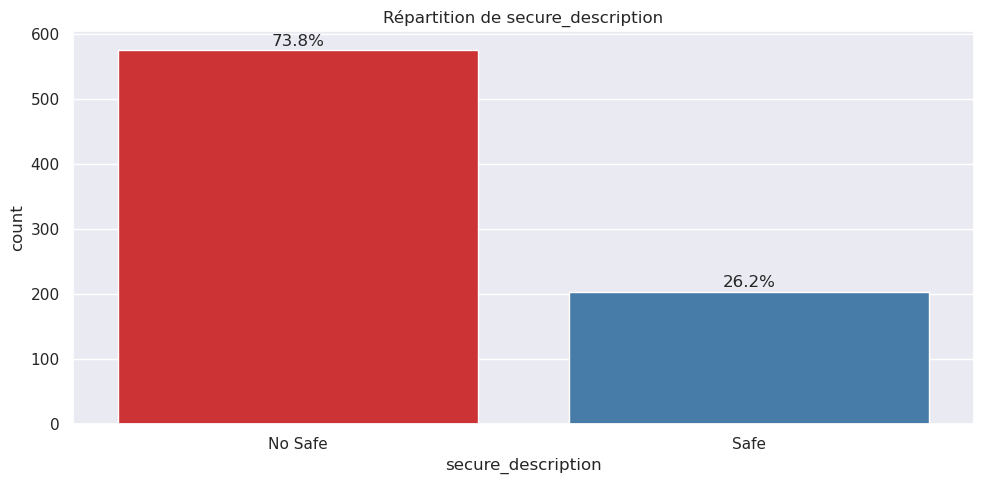

In [295]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="secure_description", data=df, palette='Set1', hue='secure_description', legend=False)  
plt.title("Répartition de secure_description")

total = len(df["secure_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


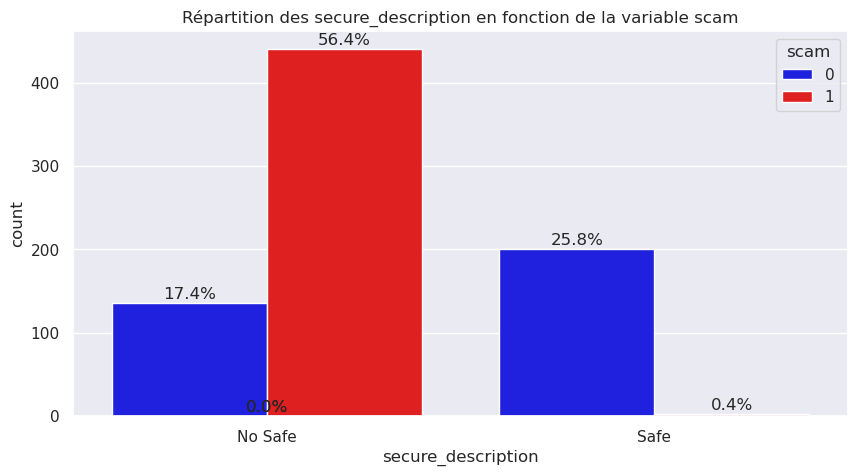

In [296]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="secure_description", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition des secure_description en fonction de la variable scam")

total = len(df["secure_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

Has Emoji Description

In [297]:
df['has_emoji_description'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: has_emoji_description
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [298]:
# Taux de na
(df["has_emoji_description"].isna().sum())/(len(df.index))

0.0

In [299]:
# Valeurs et Nombre de valeurs distinctes
print(df["has_emoji_description"].unique())
df["has_emoji_description"].nunique()

['Present' 'No Present']


2

In [300]:
# Étendue des valeurs, Équilibre
df["has_emoji_description"].value_counts()

has_emoji_description
No Present    525
Present       255
Name: count, dtype: int64

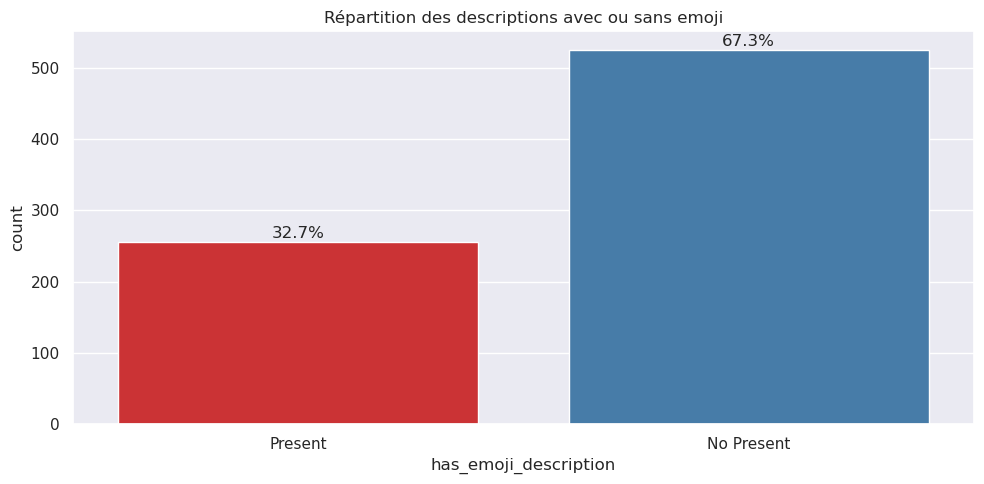

In [301]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="has_emoji_description", data=df, palette='Set1', hue='has_emoji_description', legend=False)  
plt.title("Répartition des descriptions avec ou sans emoji")

total = len(df["has_emoji_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

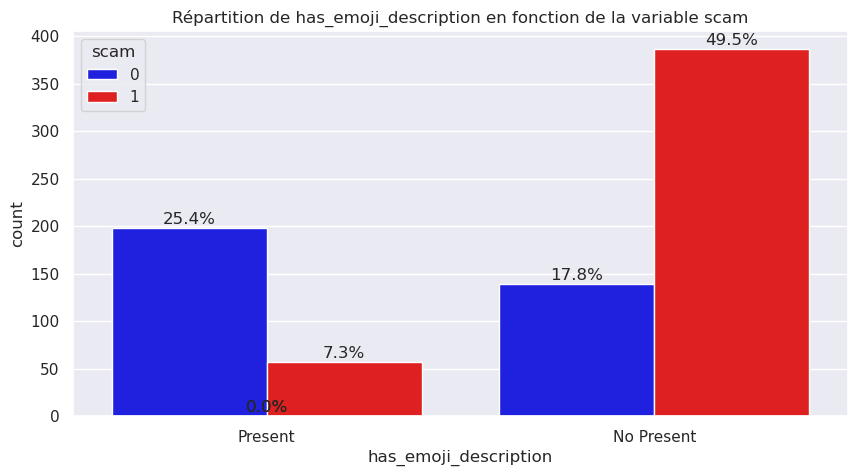

In [302]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="has_emoji_description", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de has_emoji_description en fonction de la variable scam")

total = len(df["has_emoji_description"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Gender

In [303]:
df['gender'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
343 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [304]:
# Taux de na
(df["gender"].isna().sum())/(len(df.index))

0.5602564102564103

In [305]:
# Valeurs et Nombre de valeurs distinctes
print(df["gender"].unique())
df["gender"].nunique()

[nan 'F' 'M' 'O']


3

In [306]:
# Étendue des valeurs, Équilibre
df["gender"].value_counts()

gender
F    183
M    157
O      3
Name: count, dtype: int64

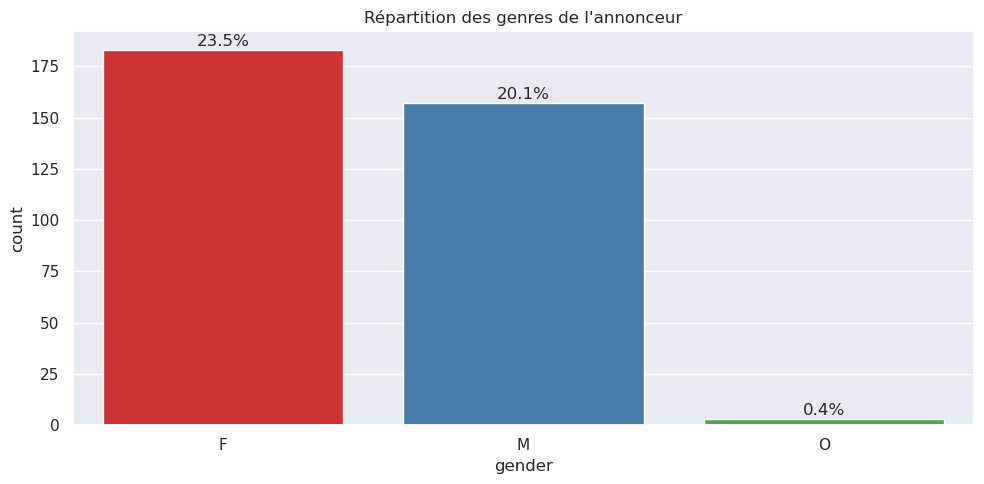

In [307]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="gender", data=df, palette='Set1', hue='gender', legend=False)  
plt.title("Répartition des genres de l'annonceur")

total = len(df["gender"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


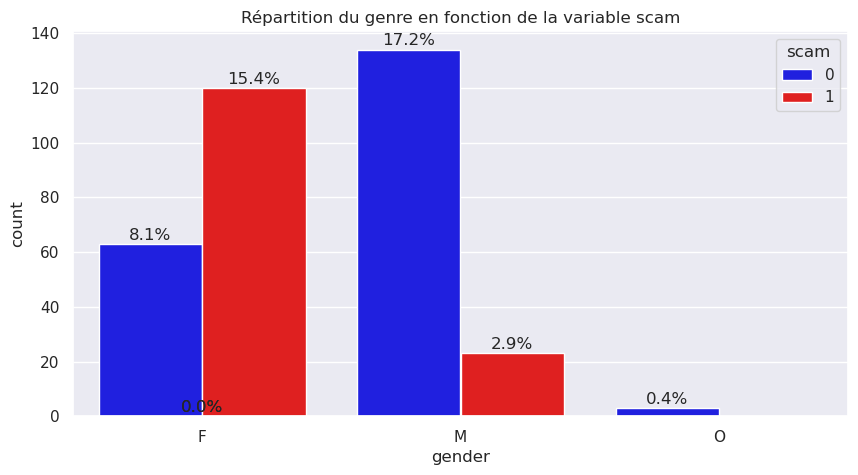

In [308]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="gender", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition du genre en fonction de la variable scam")

total = len(df["gender"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Photo

In [309]:
df['photo'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: photo
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [310]:
# Taux de na
(df["photo"].isna().sum())/(len(df.index))

0.0

In [311]:
# Valeurs et Nombre de valeurs distinctes
print(df["photo"].unique())
df["photo"].nunique()


['No photo' 'Photo']


2

In [312]:
# Étendue des valeurs, Équilibre
df["photo"].value_counts()

photo
Photo       724
No photo     56
Name: count, dtype: int64

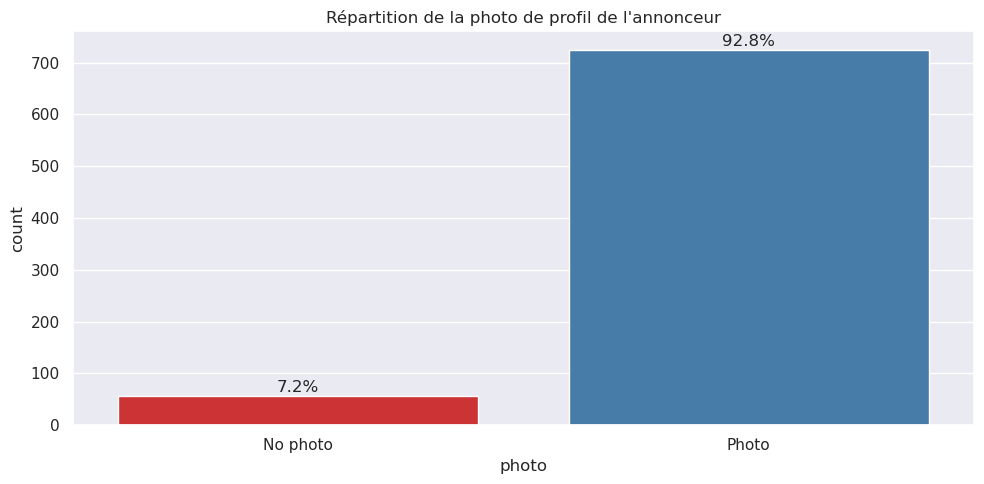

In [313]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="photo", data=df, palette='Set1', hue='photo', legend=False)  
plt.title("Répartition de la photo de profil de l'annonceur")

total = len(df["photo"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

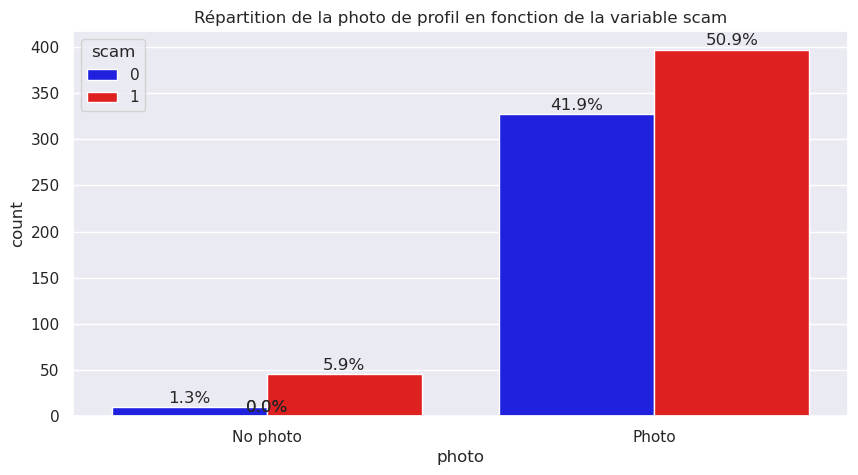

In [314]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="photo", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la photo de profil en fonction de la variable scam")

total = len(df["photo"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Is Publish Photo Agreed

In [315]:
df['is_publish_photos_agreed'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: is_publish_photos_agreed
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [316]:
# Taux de na
(df["is_publish_photos_agreed"].isna().sum())/(len(df.index))

0.0

In [317]:
# Valeurs et Nombre de valeurs distinctes
print(df["is_publish_photos_agreed"].unique())
df["is_publish_photos_agreed"].nunique()


[False  True]


2

In [318]:
# Étendue des valeurs, Équilibre
df["is_publish_photos_agreed"].value_counts()

is_publish_photos_agreed
False    726
True      54
Name: count, dtype: int64

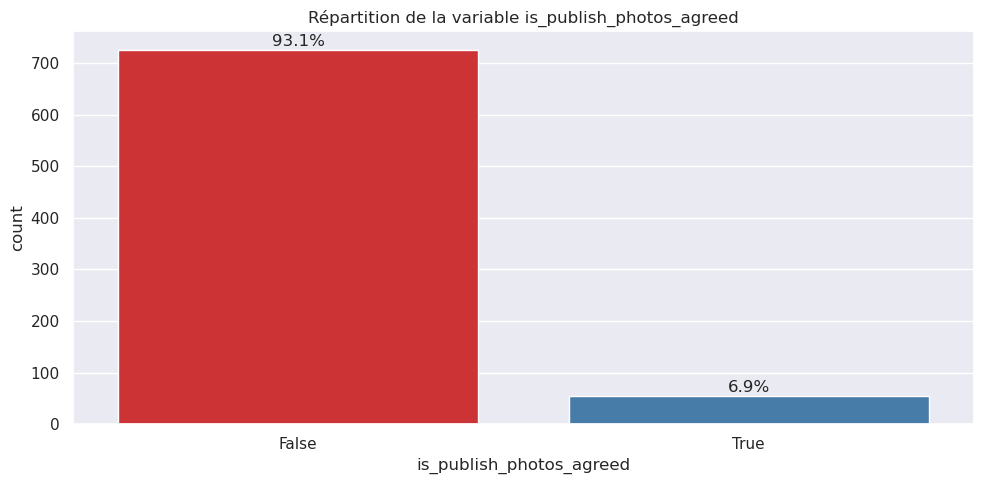

In [319]:
df['is_publish_photos_agreed'] = df['is_publish_photos_agreed'].replace({0: 'Non accord', 1:'Accord'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="is_publish_photos_agreed", data=df, palette='Set1', hue='is_publish_photos_agreed', legend=False)  
plt.title("Répartition de la variable is_publish_photos_agreed")

total = len(df["is_publish_photos_agreed"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


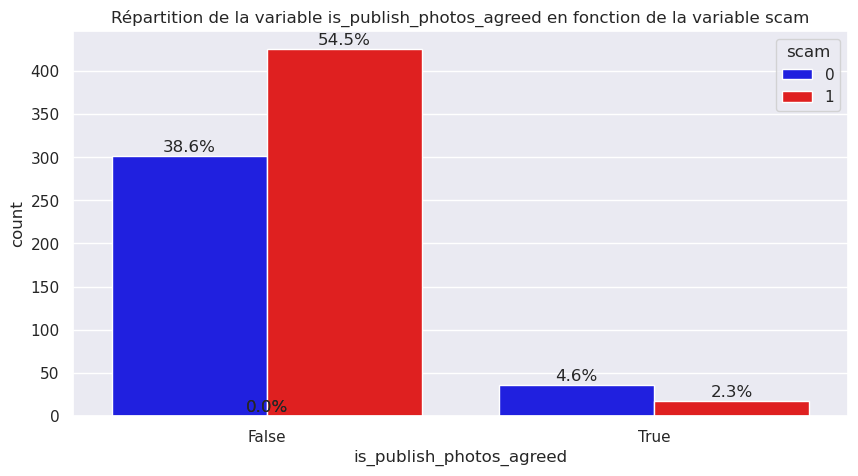

In [320]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="is_publish_photos_agreed", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable is_publish_photos_agreed en fonction de la variable scam")

total = len(df["is_publish_photos_agreed"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Verification Facebook

In [321]:
df['verification_facebook'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: verification_facebook
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [322]:
# Taux de na
(df["verification_facebook"].isna().sum())/(len(df.index))

0.0

In [323]:
# Valeurs et Nombre de valeurs distinctes
print(df["verification_facebook"].unique())
df["verification_facebook"].nunique()


[False  True]


2

In [324]:
# Étendue des valeurs, Équilibre
df["verification_facebook"].value_counts()

verification_facebook
False    683
True      97
Name: count, dtype: int64

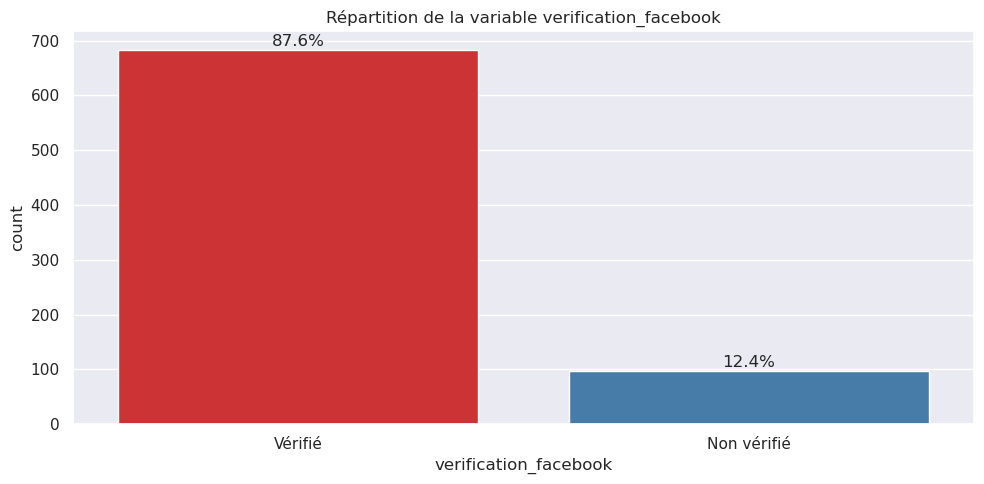

In [325]:
df['verification_facebook'] = df['verification_facebook'].replace({False: 'Vérifié', True: 'Non vérifié'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_facebook", data=df, palette='Set1', hue='verification_facebook', legend=False)  
plt.title("Répartition de la variable verification_facebook")

total = len(df["verification_facebook"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


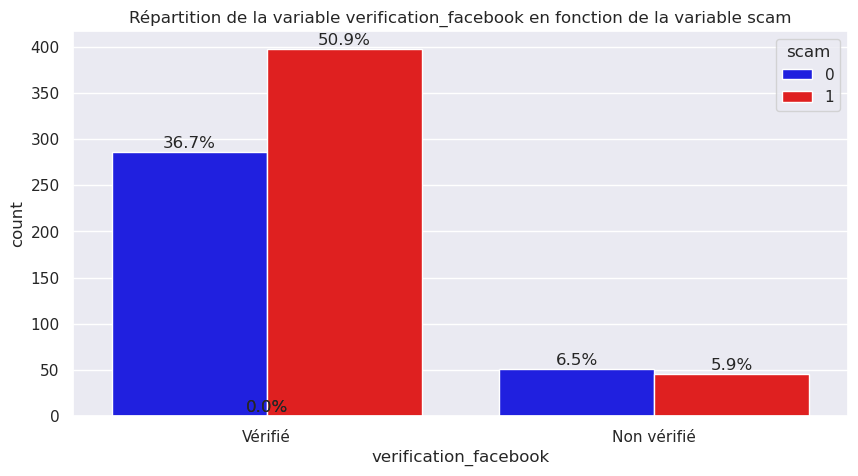

In [326]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_facebook", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable verification_facebook en fonction de la variable scam")

total = len(df["verification_facebook"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Verification Google

In [327]:
df['verification_google'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: verification_google
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [328]:
# Taux de na
(df["is_publish_photos_agreed"].isna().sum())/(len(df.index))

0.0

In [329]:
# Valeurs et Nombre de valeurs distinctes
print(df["is_publish_photos_agreed"].unique())
df["is_publish_photos_agreed"].nunique()


[False  True]


2

In [330]:
# Étendue des valeurs, Équilibre
df["is_publish_photos_agreed"].value_counts()

is_publish_photos_agreed
False    726
True      54
Name: count, dtype: int64

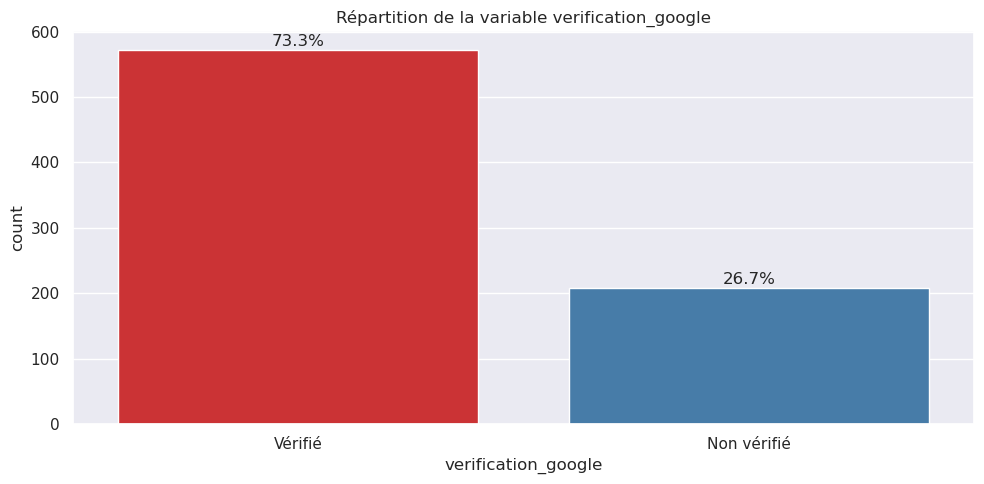

In [331]:
df['verification_google'] = df['verification_google'].replace({False: 'Vérifié', True: 'Non vérifié'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_google", data=df, palette='Set1', hue='verification_google', legend=False)  
plt.title("Répartition de la variable verification_google")

total = len(df["verification_google"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


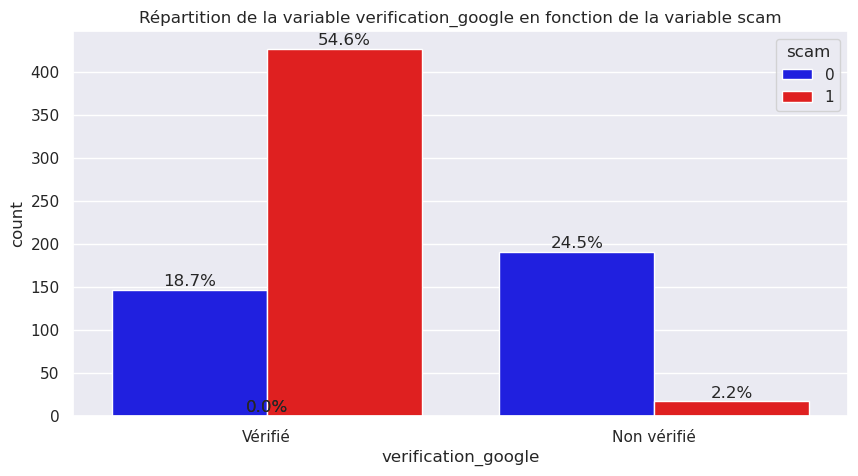

In [332]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_google", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable verification_google en fonction de la variable scam")

total = len(df["verification_google"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Verification Phone

In [333]:
df['verification_phone'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: verification_phone
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [334]:
# Taux de na
(df["is_publish_photos_agreed"].isna().sum())/(len(df.index))

0.0

In [335]:
# Valeurs et Nombre de valeurs distinctes
print(df["is_publish_photos_agreed"].unique())
df["is_publish_photos_agreed"].nunique()


[False  True]


2

In [336]:
# Étendue des valeurs, Équilibre
df["is_publish_photos_agreed"].value_counts()

is_publish_photos_agreed
False    726
True      54
Name: count, dtype: int64

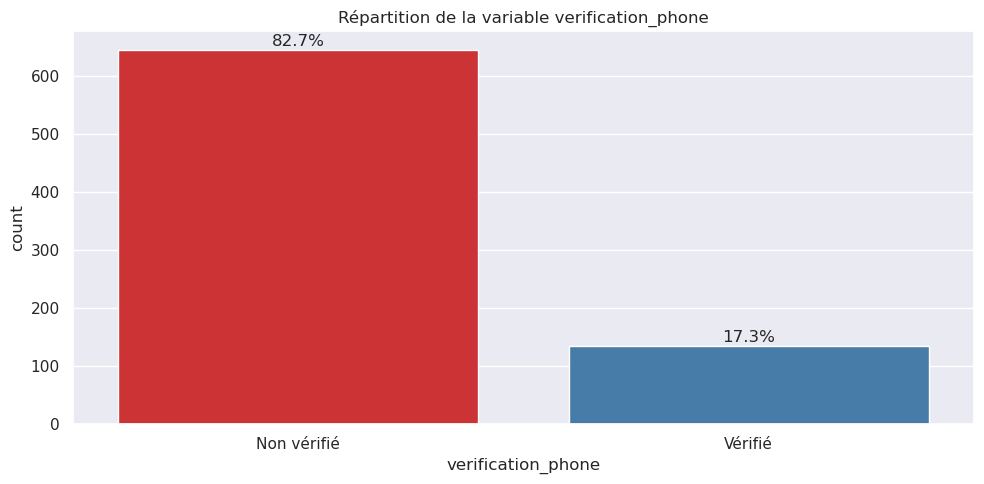

In [337]:
df['verification_phone'] = df['verification_phone'].replace({False: 'Vérifié', True: 'Non vérifié'})
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_phone", data=df, palette='Set1', hue='verification_phone', legend=False)  
plt.title("Répartition de la variable verification_phone")

total = len(df["verification_phone"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()


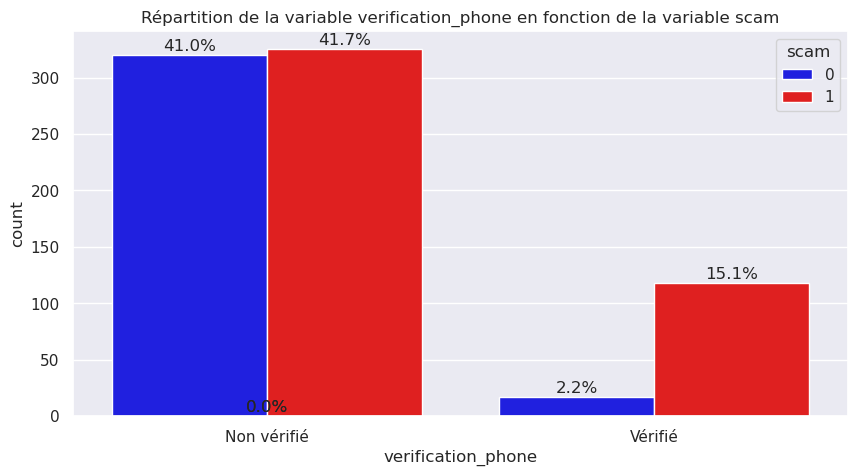

In [338]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="verification_phone", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable verification_phone en fonction de la variable scam")

total = len(df["verification_phone"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### Price_decimal

In [339]:
df['price_decimal'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: price_decimal
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [340]:
# Taux de na
(df["price_decimal"].isna().sum())/(len(df.index))

0.0

In [341]:
# Valeurs et Nombre de valeurs distinctes
print(df["price_decimal"].unique())
df["price_decimal"].nunique()

['Standard Price' 'Decimal Price']


2

In [342]:
# Étendue des valeurs, Équilibre
df["price_decimal"].value_counts()

price_decimal
Standard Price    649
Decimal Price     131
Name: count, dtype: int64

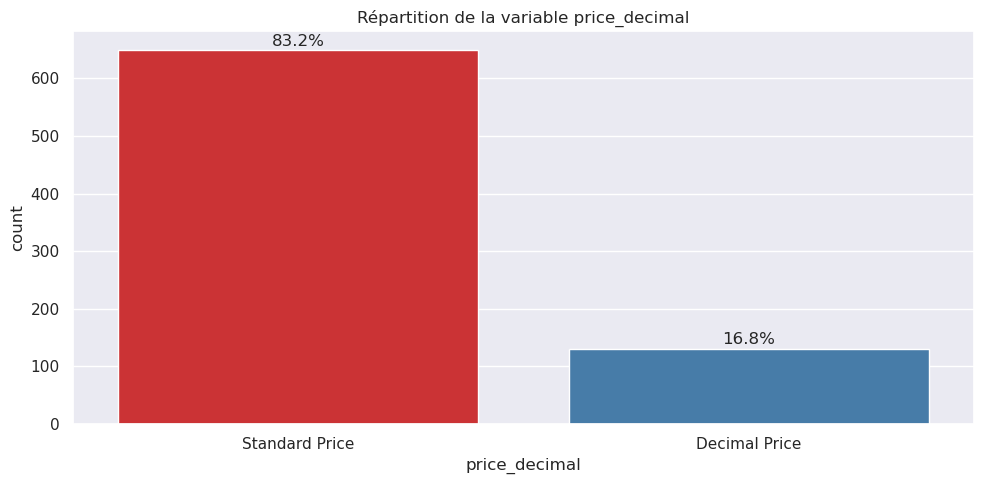

In [343]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="price_decimal", data=df, palette='Set1', hue='price_decimal', legend=False)  
plt.title("Répartition de la variable price_decimal")

total = len(df["price_decimal"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

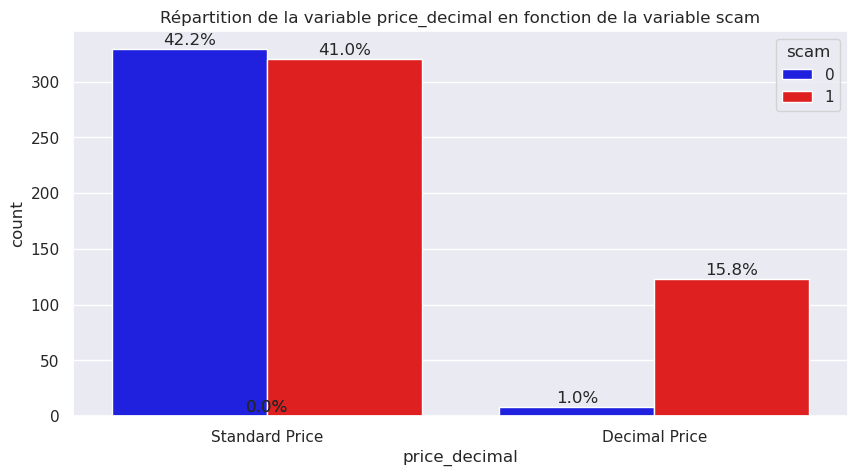

In [344]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="price_decimal", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable price_decimal en fonction de la variable scam")

total = len(df["price_decimal"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### expose_location

In [345]:
df['expose_location'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: expose_location
Non-Null Count  Dtype
--------------  -----
780 non-null    bool 
dtypes: bool(1)
memory usage: 6.9 KB


In [346]:
# Taux de na
(df["expose_location"].isna().sum())/(len(df.index))

0.0

In [347]:
# Valeurs et Nombre de valeurs distinctes
print(df["expose_location"].unique())
df["expose_location"].nunique()

[ True False]


2

In [348]:
# Étendue des valeurs, Équilibre
df["expose_location"].value_counts()

expose_location
True     656
False    124
Name: count, dtype: int64

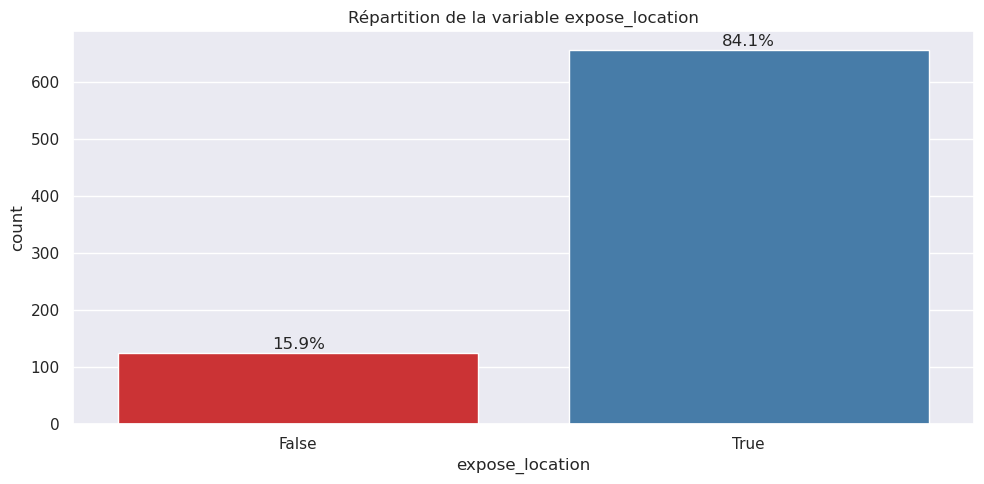

In [349]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="expose_location", data=df, palette='Set1', hue='expose_location', legend=False)  
plt.title("Répartition de la variable expose_location")

total = len(df["expose_location"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

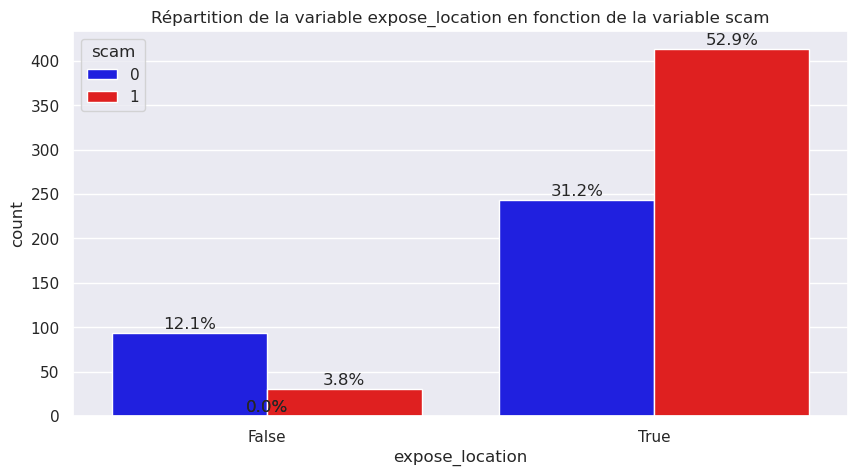

In [350]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="expose_location", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable expose_location en fonction de la variable scam")

total = len(df["expose_location"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

##### City

In [351]:
df['city'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: city
Non-Null Count  Dtype 
--------------  ----- 
642 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [352]:
# Taux de na
(df["city"].isna().sum())/(len(df.index))

0.17692307692307693

In [353]:
# Valeurs et Nombre de valeurs distinctes
print(df["city"].unique())
df["city"].nunique()

['Apremont' 'Angoulême' 'Paris' 'Marseille 11' 'Saussey' 'Montpellier'
 'Rennes' nan 'Le Puy-en-Velay' 'Colmar' 'Montbéliard' 'Paris 16' 'Toulon'
 'Marseille' 'Nantes' 'Saint-Broladre' 'Douai' 'Toulouse' 'Aubagne'
 'Drancy' 'Wattrelos' 'Lyon' 'Tours' 'Gragnague' 'Berriac' 'Alès'
 'Saint-Étienne' 'Rueil-Malmaison' 'Saint-Denis' 'Cholet' 'Sancé'
 'Dainville' 'Bastia' 'Montreuil' 'Saint-Jean-de-Beauregard' 'Crosne'
 'Agoncillo' 'Le Havre' 'Chaumont' 'Nice' 'Pau' 'Saint-Laurent-Nouan'
 'Couëron' 'Nancy' 'Aarsele' 'Sevran' 'Tournoisis' 'Chilhac'
 'Bienville-la-Petite' 'Annecy' 'Corbeil-Essonnes' 'Le Mans'
 'La Bouilladisse' 'Ruffec' 'Charrin' 'La Ferrière-Béchet' 'Boisemont'
 "L'Haÿ-les-Roses" 'Puyloubier' 'Sint-Niklaas' 'Gennevilliers' 'Rouen'
 'Villeparisis' 'Draveil' 'Versailles' 'Luxembourg' 'Stiring-Wendel'
 'Marseille 04' "La Neuville-Chant-d'Oisel" 'Strasbourg' 'Tessy-Bocage'
 'Montgeron' 'Neuilly-sur-Seine' 'Janzé' 'Goussainville' 'Donnery'
 'Le Malesherbois' 'Annecy-le-Vieux' 'Dunk

269

##### country_title

In [354]:
df['country_title'].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: country_title
Non-Null Count  Dtype 
--------------  ----- 
780 non-null    object
dtypes: object(1)
memory usage: 12.2+ KB


In [355]:
# Taux de na
(df["country_title"].isna().sum())/(len(df.index))

0.0

In [356]:
# Valeurs et Nombre de valeurs distinctes
print(df["country_title"].unique())
df["country_title"].nunique()

['France' 'Frankreich' 'Frankrijk' 'Francia' 'Spain' 'Belgium' 'Belgique'
 'Luxembourg' 'Pays-Bas' 'Luxemburg' 'België' 'França' 'España' 'Italie'
 'Italien']


15

In [357]:
# Étendue des valeurs, Équilibre
df["country_title"].value_counts()

country_title
France        635
Francia        57
Frankreich     51
Frankrijk      15
Belgique        8
Belgium         2
Luxembourg      2
Italie          2
Pays-Bas        2
Spain           1
Luxemburg       1
België          1
França          1
España          1
Italien         1
Name: count, dtype: int64

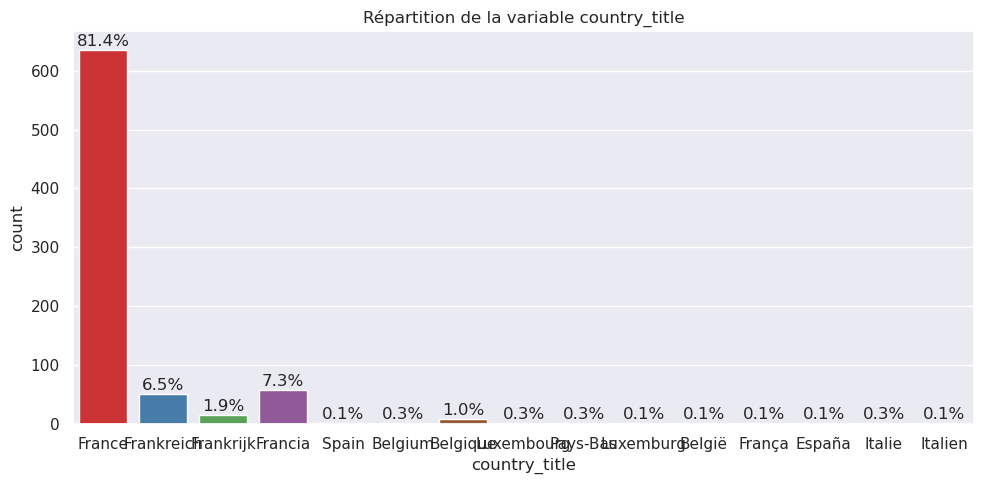

In [358]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="country_title", data=df, palette='Set1', hue='country_title', legend=False)  
plt.title("Répartition de la variable country_title")

total = len(df["country_title"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

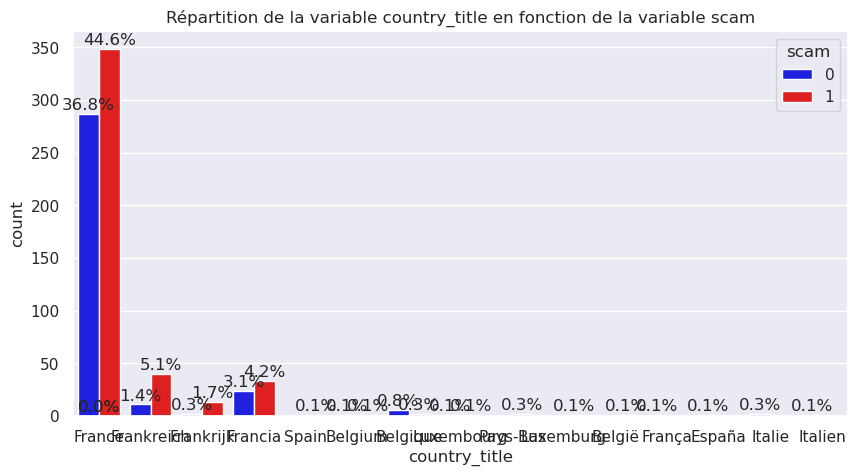

In [359]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="country_title", data=df, hue='scam', palette={1:'red',0:'blue'}, legend=True, dodge=True)  
plt.title("Répartition de la variable country_title en fonction de la variable scam")

total = len(df["country_title"])
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

#### Variables quantitatives

##### Size

In [360]:
# type, nombres valeurs
df["size"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: size
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [361]:
# Taux de na
(df["size"].isna().sum())/(len(df.index))

0.0

In [362]:
# Valeurs et Nombre de valeurs distinctes
print(df["size"].unique())
df["size"].nunique()

[39.  37.  38.  41.  37.5 40.  43.  42.  36.  38.5 44.5 35.  44.  35.5
 36.5 45.  42.5 41.5 39.5 46.  40.5 45.5 48.  47.  43.5]


25

In [363]:
# Étendue des valeurs, Équilibre
df["size"].value_counts()

size
39.0    144
38.0    144
40.0     70
37.0     64
38.5     62
42.0     55
41.0     43
36.0     36
37.5     30
43.0     24
44.0     21
36.5     18
40.5     17
42.5      9
45.0      9
44.5      9
35.5      5
39.5      5
41.5      5
46.0      4
43.5      2
35.0      1
45.5      1
48.0      1
47.0      1
Name: count, dtype: int64

In [364]:
# Valeur Minimale
df["size"].min()

35.0

In [365]:
# Valeur Maximale
df["size"].max()

48.0

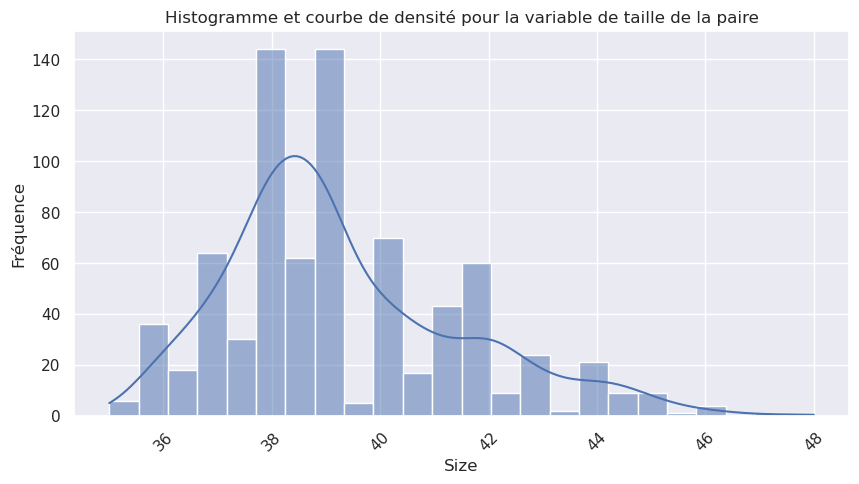

In [366]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('size')
sns.histplot(df_sorted['size'], kde=True)
plt.xlabel('Size')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable de taille de la paire")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

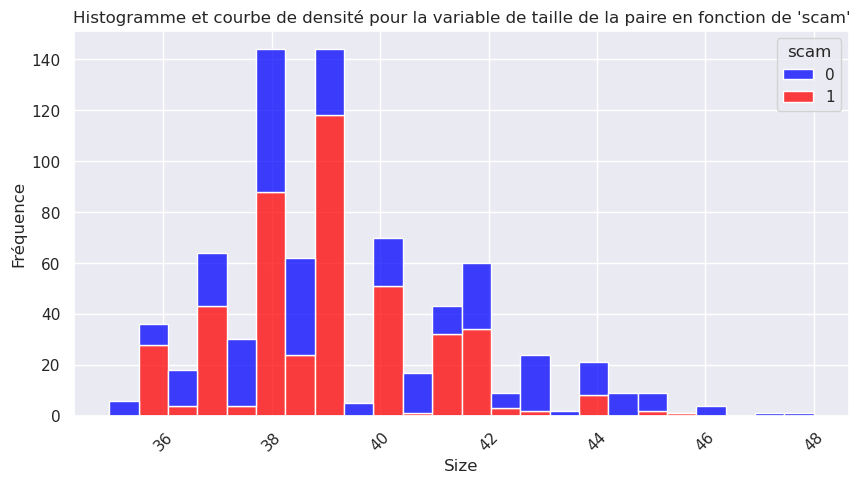

In [367]:
df_sorted = df.sort_values('size')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='size', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('Size')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable de taille de la paire en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [368]:
stat, p = shapiro(df['size'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.931952178478241
P-value : 2.362221241093462e-18
La variable n'est probablement pas normalement distribuée


##### Price


In [369]:
# type, nombres valeurs
df["price"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: price
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [370]:
# Taux de na
(df["price"].isna().sum())/(len(df.index))


0.0

In [371]:

# Valeurs et Nombre de valeurs distinctes
print(df["price"].unique())
df["price"].nunique()


[ 49.9   50.    65.    80.    68.    60.    51.    49.59  84.    59.9
  45.55  57.    50.24  50.52  58.    75.    48.6   82.5   56.78 105.
  50.15  86.7   50.34  59.74  82.    64.    78.    90.25  55.    72.5
  76.    79.    60.99  61.2   56.    64.9   70.    99.    59.    98.88
  69.9   85.    89.    59.98  70.1   78.99  54.9   50.65 100.    86.35
  88.7   88.    96.3  160.   102.5   99.96  95.    86.3  102.    87.05
  89.5  103.   140.    92.11  98.    50.29 102.6   91.7  100.05  50.84
  92.8   89.99  50.54 101.05 118.5  155.    63.39  50.48  87.    75.6
 120.    59.99 145.    86.25 100.8   93.   100.85  90.32  90.    50.64
 108.11  93.8  100.77 108.   179.65 101.    49.33 115.   130.    94.
 100.21  90.5  190.   129.99  84.55 107.8   65.11 106.75  50.13  50.16
 105.77  66.   107.9   49.58 106.    49.24 102.8   92.7  100.5   75.11
  83.6  108.97 105.63  58.99  50.95  49.52 106.32  50.43 165.   159.
 109.57 125.   150.   107.25  50.05 106.25  95.5  105.75 129.   109.88
 106.45  69.   

221

In [372]:
# Étendue des valeurs, Équilibre
df["price"].value_counts()

price
150.00    48
140.00    40
145.00    36
130.00    34
65.00     28
          ..
90.50      1
84.55      1
107.80     1
65.11      1
50.64      1
Name: count, Length: 221, dtype: int64

In [373]:

# Valeur Minimale
print("min", df["price"].min())

# Valeur Maximale
print("max",df["price"].max())


min 45.55
max 320.0


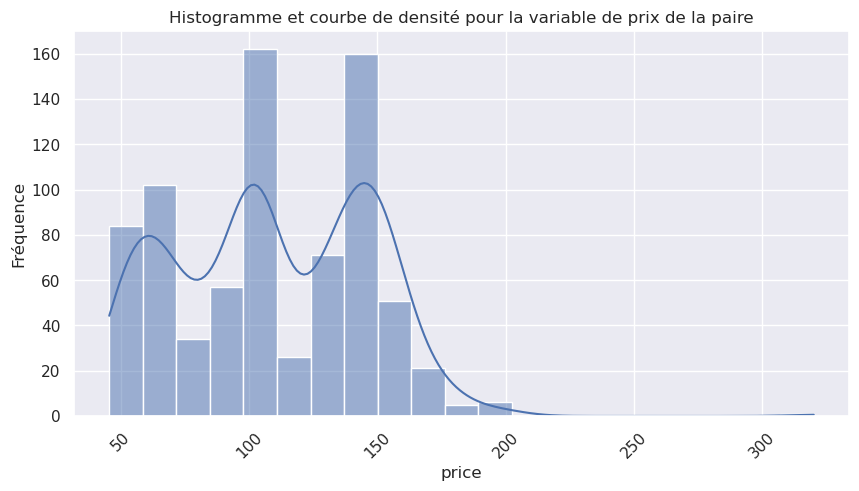

In [374]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('price')
sns.histplot(df_sorted['price'], kde=True)
plt.xlabel('price')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable de prix de la paire")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

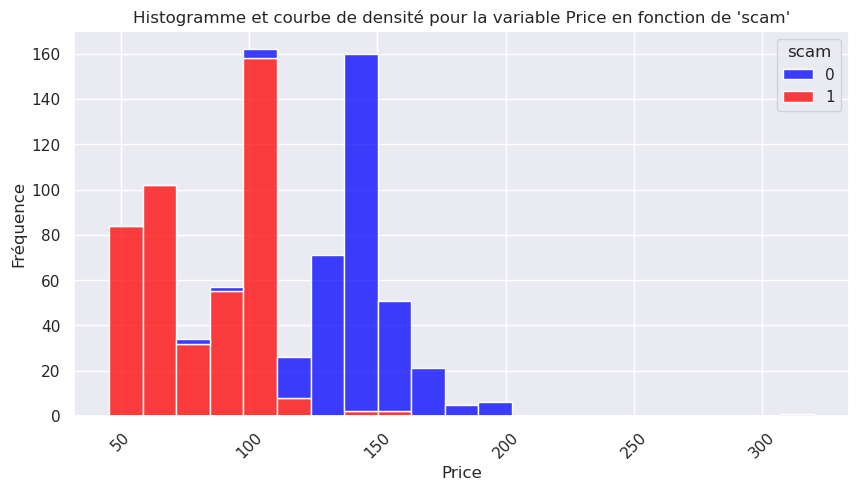

In [375]:
df_sorted = df.sort_values('price')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='price', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('Price')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable Price en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [376]:
stat, p = shapiro(df['price'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.9493435621261597
P-value : 1.040310830982918e-15
La variable n'est probablement pas normalement distribuée


Ressel Price

In [377]:
# type, nombres valeurs
df["ressell_price"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: ressell_price
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [378]:
# Taux de na
(df["ressell_price"].isna().sum())/(len(df.index))

0.0

In [379]:
# Valeurs et Nombre de valeurs distinctes
print(df["ressell_price"].unique())
df["ressell_price"].nunique()


[129 111 143 118 263 137 110 216 136 128 126 271 188 125 231 116 185 131
 155 117 132 112 130 114 121 150 165 122 266 113 134 281 283 120 408 215
 151 158 146 147 217 127 115]


43

In [380]:
# Étendue des valeurs, Équilibre
df["ressell_price"].value_counts()


ressell_price
110    101
143     88
129     71
118     59
137     57
216     48
128     46
111     43
185     35
188     25
231     23
271     20
125     14
263     13
136     13
266     13
117     10
112     10
114     10
126      9
130      8
122      8
132      6
116      6
131      6
150      5
113      5
155      4
165      4
283      4
120      2
115      2
127      2
121      1
134      1
408      1
281      1
215      1
151      1
146      1
158      1
217      1
147      1
Name: count, dtype: int64

In [381]:
# Valeur Minimale
print("min:",df["ressell_price"].min())
# Valeur Maximale
print("max:",df["ressell_price"].max())


min: 110
max: 408


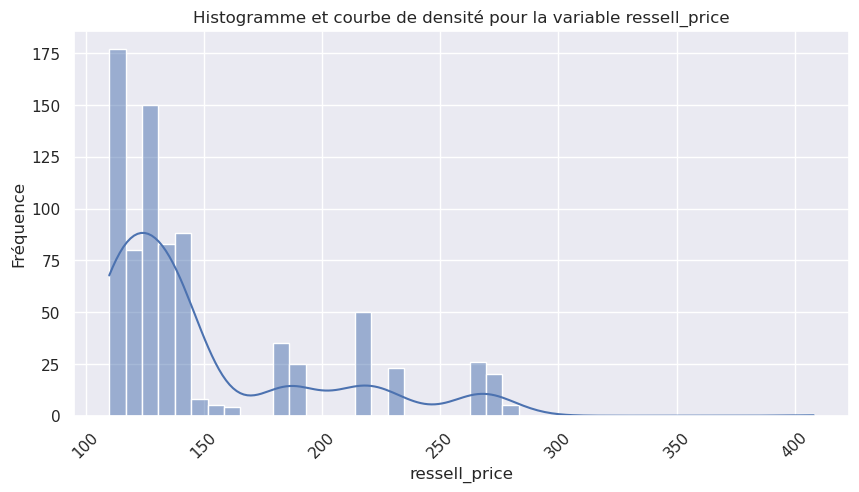

In [382]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('ressell_price')
sns.histplot(df_sorted['ressell_price'], kde=True)
plt.xlabel('ressell_price')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable ressell_price")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

In [383]:
stat, p = shapiro(df['ressell_price'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.7676541209220886
P-value : 9.106099231759318e-32
La variable n'est probablement pas normalement distribuée


##### Item Count


In [384]:
# type, nombres valeurs
df["item_count"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: item_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [385]:
# Taux de na
(df["item_count"].isna().sum())/(len(df.index))

0.0

In [386]:
# Valeurs et Nombre de valeurs distinctes
print(df["item_count"].unique())
df["item_count"].nunique()

[ 17   4   3   1   5   8  11   9   2  20   7  19  16  13  12  18  60   6
  10  33  25  15  89  27  32  53  21  82  14  98  47  65  99  29  28  26
  31 148  40  61  63 113  86  52  24  23  22  38  30  39  48 103  35  90
  81  55 183 108 276  44  76 137 341]


63

In [387]:
# Étendue des valeurs, Équilibre
df["item_count"].value_counts()

item_count
2      131
5       92
3       91
1       71
4       59
      ... 
183      1
276      1
44       1
137      1
341      1
Name: count, Length: 63, dtype: int64

In [388]:
# Valeur Minimale
print("min:",df["item_count"].min())
# Valeur Maximale
print("max:",df["item_count"].max())


min: 1
max: 341


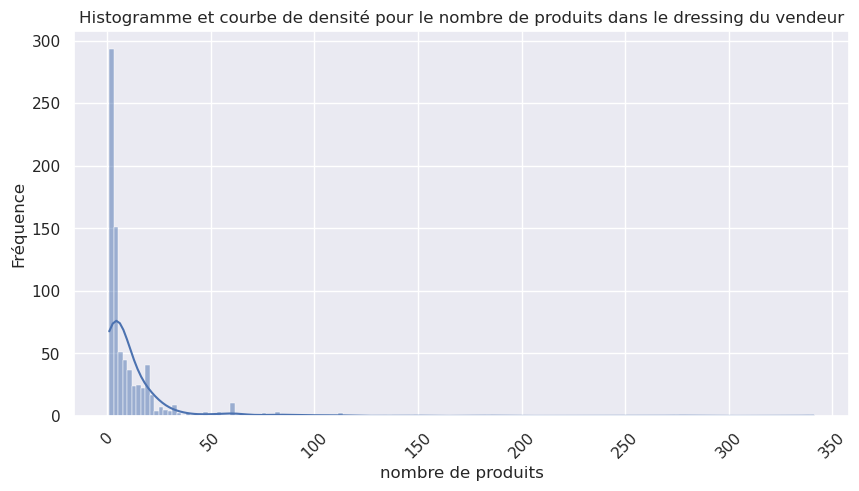

In [389]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('item_count')
sns.histplot(df_sorted['item_count'], kde=True)
plt.xlabel('nombre de produits')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour le nombre de produits dans le dressing du vendeur")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

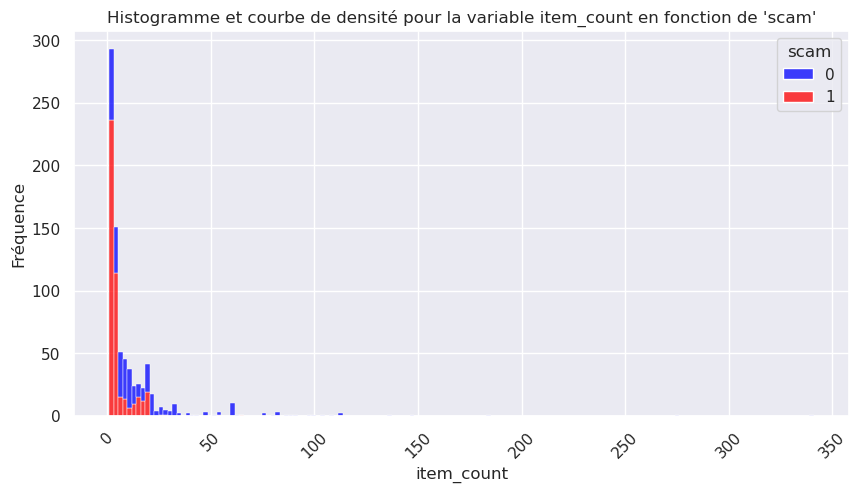

In [390]:
df_sorted = df.sort_values('item_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='item_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('item_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable item_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [391]:
stat, p = shapiro(df['item_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.4100017547607422
P-value : 1.5414283107572988e-44
La variable n'est probablement pas normalement distribuée


##### Total Item count


In [392]:
# type, nombres valeurs
df["total_items_count"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: total_items_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [393]:
# Taux de na
(df["total_items_count"].isna().sum())/(len(df.index))

0.0

In [394]:
# Valeurs et Nombre de valeurs distinctes
print(df["total_items_count"].unique())
df["total_items_count"].nunique()

[  17    9    3    5    8   11   10    6   18    4   20    7    2    1
   12   45   13   22   23   16   19   26   15   14   62   50   33  697
   37  234   28   40   63   27   55  172   92  202   58   99   53   39
   35  204  210   34   72   97   49  112   60  277   36  124  109  394
   24  190   88  351   56  432   44   96   74   79  113   98   41   54
   68   21   69   51   32   38   57  177  213  169   29  141  728  182
  154  185   87   52   42  102  160 1146  201  114  103   30   78  140
   47  127   65   61   31  197   59  130   67   81   43   25   84  815
  116   86  170  179  149  159   46  104  353   76  828   93  446  175
  216  258  119 1240  101  280  106  176  220  142  218   48  526  297
  852]


141

In [395]:
# Étendue des valeurs, Équilibre
df["total_items_count"].value_counts()

total_items_count
5     92
3     52
4     42
2     39
20    25
      ..
67     1
81     1
43     1
25     1
87     1
Name: count, Length: 141, dtype: int64

In [396]:
# Valeur Minimale
print("min:",df["total_items_count"].min())
# Valeur Maximale
print("max:",df["total_items_count"].max())

min: 1
max: 1240


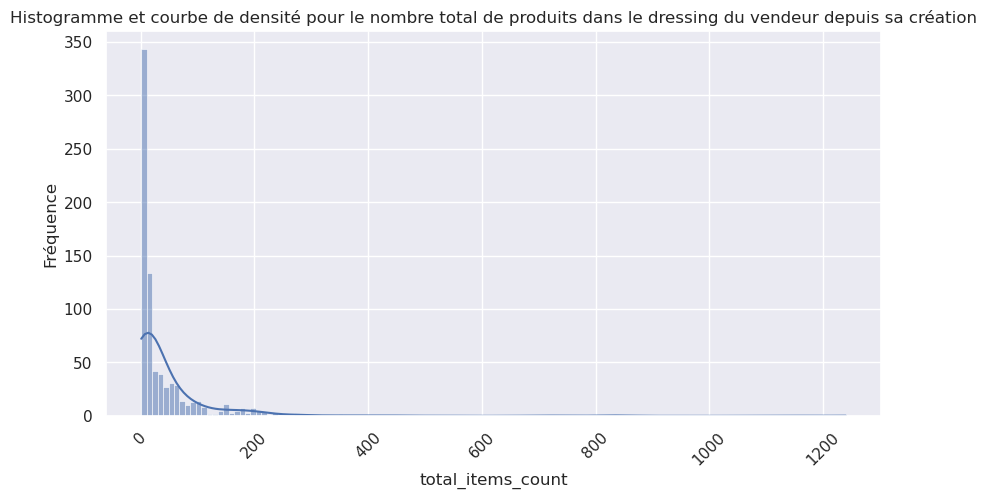

In [397]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('total_items_count')
sns.histplot(df_sorted['total_items_count'], kde=True)
plt.xlabel('total_items_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour le nombre total de produits dans le dressing du vendeur depuis sa création")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

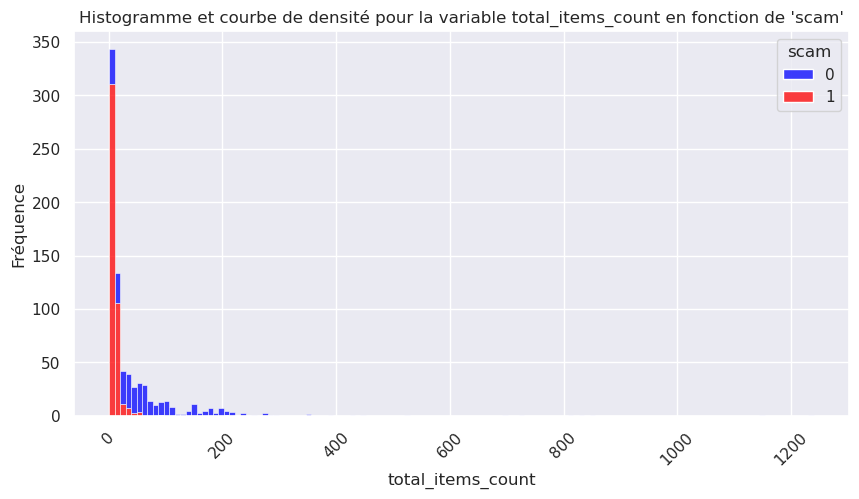

In [398]:
df_sorted = df.sort_values('total_items_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='total_items_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('total_items_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable total_items_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [399]:
stat, p = shapiro(df['total_items_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.4177507758140564
P-value : 2.382207389352189e-44
La variable n'est probablement pas normalement distribuée


##### Given Item Count 

In [400]:
# type, nombres valeurs
df["given_item_count"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: given_item_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [401]:
# Taux de na
(df["given_item_count"].isna().sum())/(len(df.index))

0.0

In [402]:
# Valeurs et Nombre de valeurs distinctes
print(df["given_item_count"].unique())
df["given_item_count"].nunique()

[   2    8    5    4    1    0    3    6   11    9   44    7   12   19
   10   15   16   18   20   13   57   23  680   35  174   14   30   58
   53  140   70  114   22   51   73   36  157   64   24   82   41   31
  101   33   49   17  200  118   29   96  299  143  255   68   34   27
  420   93   69   77   61   78   21   28   63   65   39   66   46  159
   81  186  149   45   55   42  113  583  142   95  122   37   74   32
   88  148 1129   72  117  173  125   43   38  100   25   80  704  112
   84   79  106  165   60  137  161  123  164   92  251   71  105  739
   89  366  135  156   59  178  170   90  153  228  964   40  205   98
  129  193  513   54  283  511   56   50]


134

In [403]:
# Étendue des valeurs, Équilibre
df["given_item_count"].value_counts()

given_item_count
0      140
1       64
2       62
3       45
5       32
      ... 
50       1
61       1
96       1
299      1
143      1
Name: count, Length: 134, dtype: int64

In [404]:
# Valeur Minimale
print("min:",df["given_item_count"].min())
# Valeur Maximale
print("max:",df["given_item_count"].max())

min: 0
max: 1129


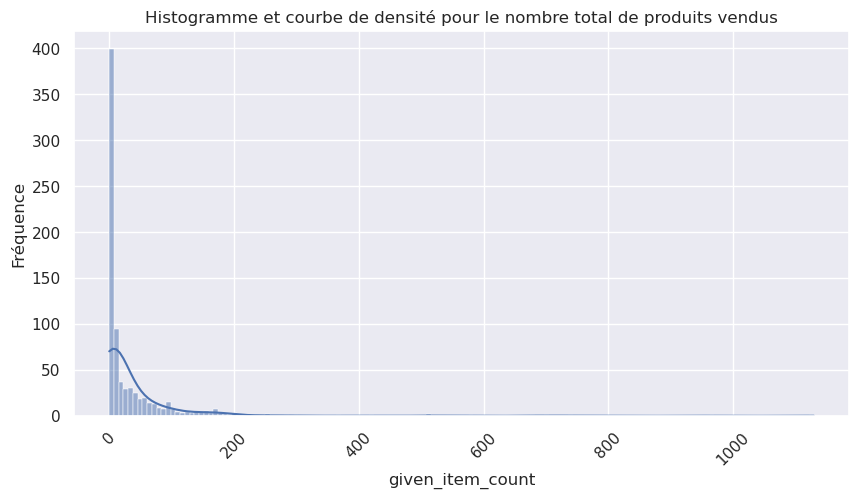

In [405]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('given_item_count')
sns.histplot(df_sorted['given_item_count'], kde=True)
plt.xlabel('given_item_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour le nombre total de produits vendus")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

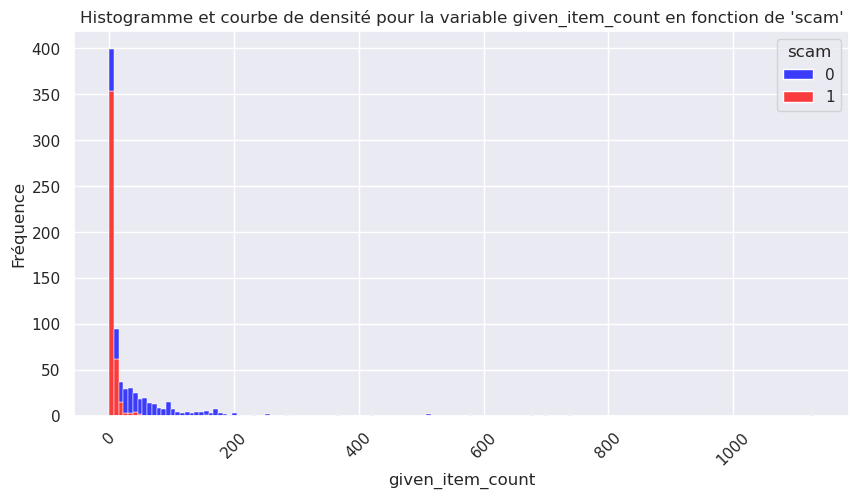

In [406]:
df_sorted = df.sort_values('given_item_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='given_item_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('given_item_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable given_item_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [407]:
stat, p = shapiro(df['given_item_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.3967437148094177
P-value : 7.006492321624085e-45
La variable n'est probablement pas normalement distribuée


##### Taken item count 

In [408]:
# type, nombres valeurs
df["taken_item_count"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: taken_item_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [409]:
# Taux de na
(df["taken_item_count"].isna().sum())/(len(df.index))

0.0

In [410]:
# Valeurs et Nombre de valeurs distinctes
print(df["taken_item_count"].unique())
df["taken_item_count"].nunique()

[  0   1   3   4   2   8 395  17  19  24  31  38  80 356  51  37  93   9
  10   5  11  12  35  22  20  14  27   6  61 181   7  23  42  48 170  21
  18  49 186  39  29 223  52  36  13  54  68  86  90 144 404  70  46  25
  28  85 627  33  16 160 152 129 120  43  91  50  15  67  62 290  75  34
  94  44 140 299 126 175 520 302  60  77  53 803 179  59]


86

In [411]:
# Étendue des valeurs, Équilibre
df["taken_item_count"].value_counts()

taken_item_count
0      393
1       48
2       28
3       24
5       23
      ... 
91       1
50       1
803      1
179      1
59       1
Name: count, Length: 86, dtype: int64

In [412]:
# Valeur Minimale
print("min:",df["taken_item_count"].min())
# Valeur Maximale
print("max:",df["taken_item_count"].max())

min: 0
max: 803


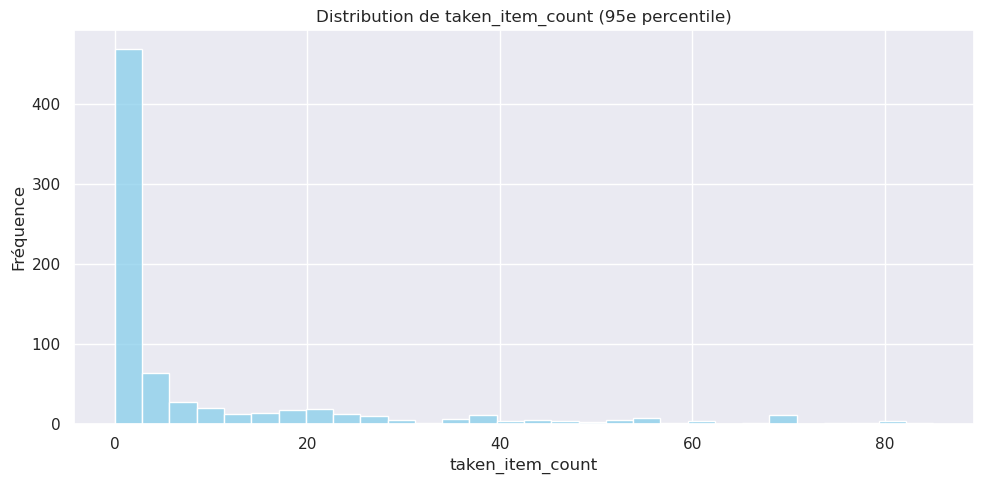

In [413]:
# Calculer le seuil comme étant le 95e percentile des données
threshold = df['taken_item_count'].quantile(0.95)

# Filtrer les données pour inclure seulement jusqu'au 95e percentile
filtered_data = df[df['taken_item_count'] <= threshold]['taken_item_count']

plt.figure(figsize=(10, 5))

sns.histplot(filtered_data, kde=False, bins=30, color='skyblue')

plt.title('Distribution de taken_item_count (95e percentile)')
plt.xlabel('taken_item_count')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

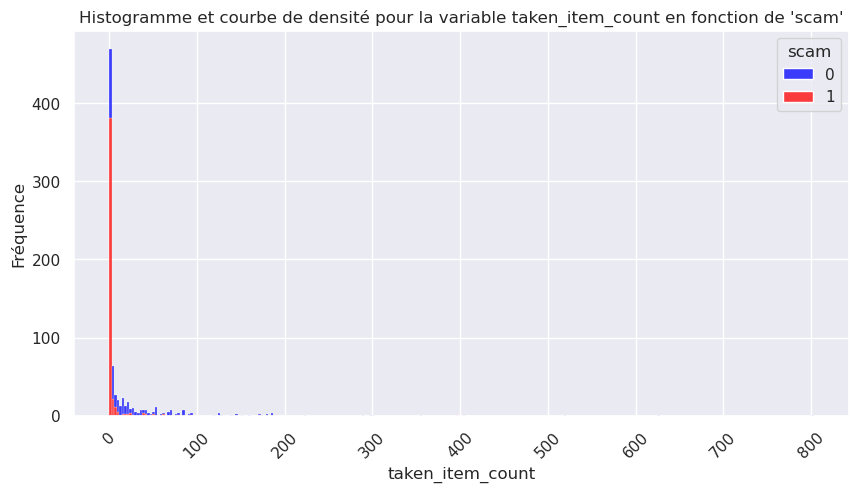

In [414]:
df_sorted = df.sort_values('taken_item_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='taken_item_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('taken_item_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable taken_item_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [415]:
stat, p = shapiro(df['taken_item_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.32866084575653076
P-value : 0.0
La variable n'est probablement pas normalement distribuée


##### Feedback Reputation 

In [416]:
# type, nombres valeurs
df["feedback_reputation"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: feedback_reputation
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [417]:
# Taux de na
(df["feedback_reputation"].isna().sum())/(len(df.index))

0.0

In [418]:
# Valeurs et Nombre de valeurs distinctes
print(df["feedback_reputation"].unique())
df["feedback_reputation"].nunique()

[0.   1.   0.2  0.8  0.96 0.98 0.92 0.6  0.94 0.9  0.88 0.72 0.76 0.68
 0.46 0.86 0.74 0.84 0.82 0.66 0.52]


21

In [419]:
 # Étendue des valeurs, Équilibre
df["feedback_reputation"].value_counts()

feedback_reputation
0.00    262
1.00    207
0.98    100
0.96     75
0.94     39
0.92     23
0.90     15
0.80     13
0.88      8
0.86      7
0.84      5
0.74      5
0.82      5
0.60      4
0.76      3
0.20      2
0.72      2
0.46      2
0.68      1
0.66      1
0.52      1
Name: count, dtype: int64

In [420]:
# Valeur Minimale
print("min:",df["feedback_reputation"].min())
# Valeur Maximale
print("max:",df["feedback_reputation"].max())

min: 0.0
max: 1.0


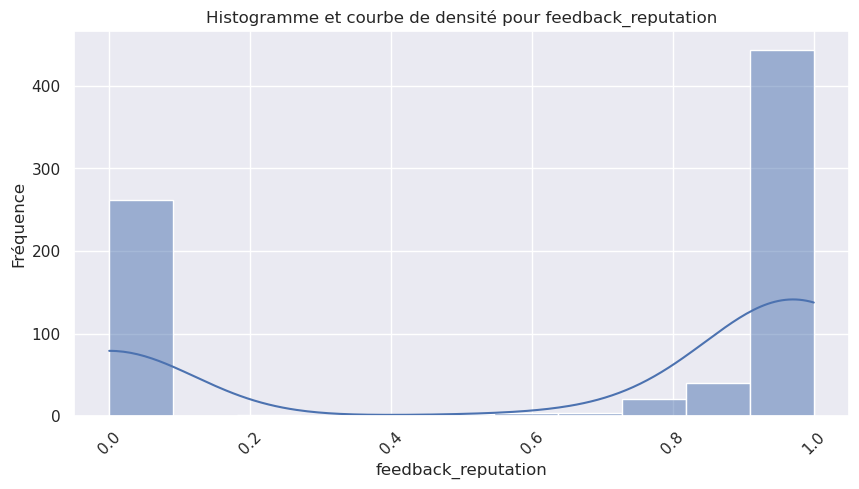

In [421]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('feedback_reputation')
sns.histplot(df_sorted['feedback_reputation'], kde=True)
plt.xlabel('feedback_reputation')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour feedback_reputation")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

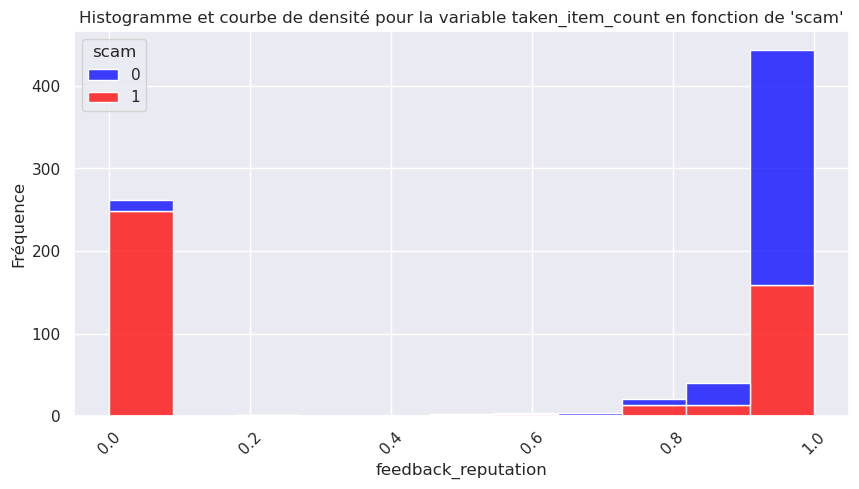

In [422]:
df_sorted = df.sort_values('feedback_reputation')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='feedback_reputation', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('feedback_reputation')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable taken_item_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [423]:
stat, p = shapiro(df['feedback_reputation'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.6609015464782715
P-value : 1.1064707381000803e-36
La variable n'est probablement pas normalement distribuée


##### Followers count 

In [424]:
# type, nombres valeurs
df["followers_count"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: followers_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [425]:
# Taux de na
(df["followers_count"].isna().sum())/(len(df.index))

0.0

In [426]:
# Valeurs et Nombre de valeurs distinctes
print(df["followers_count"].unique())
df["followers_count"].nunique()

[   1    0    4    2    3  107    9    6  794   16   19    5    7   30
   27   12   11   10   96   34   21   25   78   31   26   15   14   38
    8   32   28  222  322  323   22   64  207  144   20   17 1288   84
   73   85  157  108   33  133   13  102   74   54   66   18   58   42
  172   76  214   72]


60

In [427]:
# Étendue des valeurs, Équilibre
df["followers_count"].value_counts()

followers_count
0       382
1        80
2        39
6        33
4        26
3        24
14       17
9        16
12       15
5        14
11       11
7        10
8        10
15        8
10        7
16        6
19        6
32        5
26        4
28        4
22        4
21        3
102       3
17        3
30        3
96        3
25        3
31        2
13        2
64        2
73        2
38        2
27        2
34        2
222       2
107       1
78        1
794       1
322       1
323       1
20        1
1288      1
144       1
207       1
85        1
84        1
157       1
108       1
133       1
33        1
74        1
54        1
66        1
18        1
58        1
42        1
172       1
76        1
214       1
72        1
Name: count, dtype: int64

In [428]:
# Valeur Minimale
print("min:",df["followers_count"].min())
# Valeur Maximale
print("max:",df["followers_count"].max())

min: 0
max: 1288


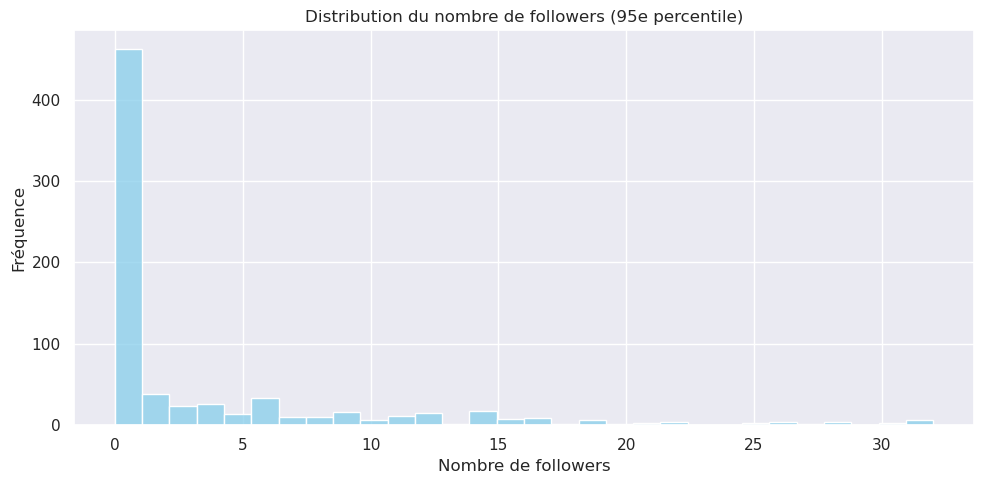

In [429]:
# Calculer le seuil comme étant le 95e percentile des données
threshold = df['followers_count'].quantile(0.95)
# Filtrer les données pour inclure seulement jusqu'au 95e percentile
filtered_data = df[df['followers_count'] <= threshold]['followers_count']

plt.figure(figsize=(10, 5))

sns.histplot(filtered_data, kde=False, bins=30, color='skyblue')

plt.title('Distribution du nombre de followers (95e percentile)')
plt.xlabel('Nombre de followers')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

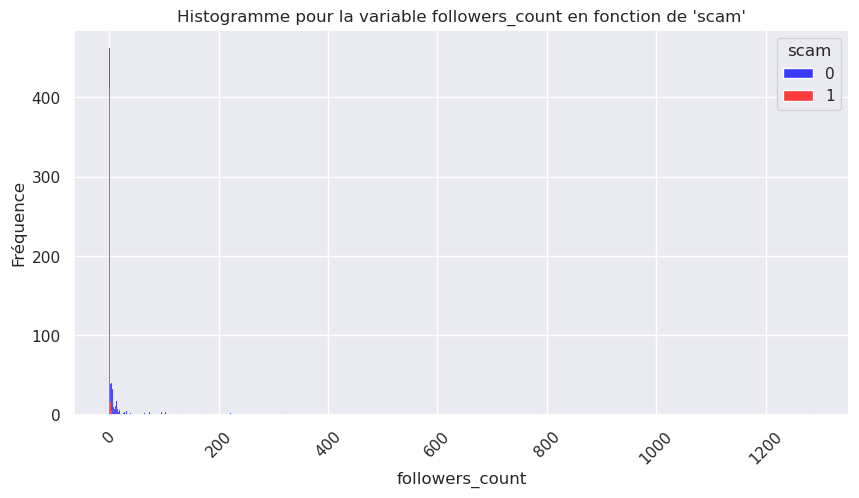

In [430]:
df_sorted = df.sort_values('followers_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='followers_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('followers_count')
plt.ylabel('Fréquence')
plt.title("Histogramme pour la variable followers_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [431]:
stat, p = shapiro(df['followers_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.15190410614013672
P-value : 0.0
La variable n'est probablement pas normalement distribuée


##### Following count 

In [432]:
# type, nombres valeurs
df["following_count"].info()


<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: following_count
Non-Null Count  Dtype
--------------  -----
780 non-null    int64
dtypes: int64(1)
memory usage: 12.2 KB


In [433]:

# Taux de na
(df["following_count"].isna().sum())/(len(df.index))


0.0

In [434]:

# Valeurs et Nombre de valeurs distinctes
print(df["following_count"].unique())
df["following_count"].nunique()


[  0   1   2   6  12  17   3   9   5   7  39   4   8  11  63  13  18  16
  10  33  24  19  25  27  28  21  20  14  99  23  64 152  44 105  15 116
  73]


37

In [435]:

# Étendue des valeurs, Équilibre
df["following_count"].value_counts()


following_count
0      468
1       77
3       41
4       33
2       31
5       18
8       16
6       11
7       10
12       9
9        6
13       5
11       5
23       5
19       5
18       4
17       3
24       3
33       3
39       3
10       3
64       2
16       2
27       2
25       2
14       2
63       1
28       1
21       1
99       1
20       1
152      1
44       1
105      1
15       1
116      1
73       1
Name: count, dtype: int64

In [436]:

# Valeur Minimale
print("min:",df["following_count"].min())
# Valeur Maximale
print("max:",df["following_count"].max())


min: 0
max: 152


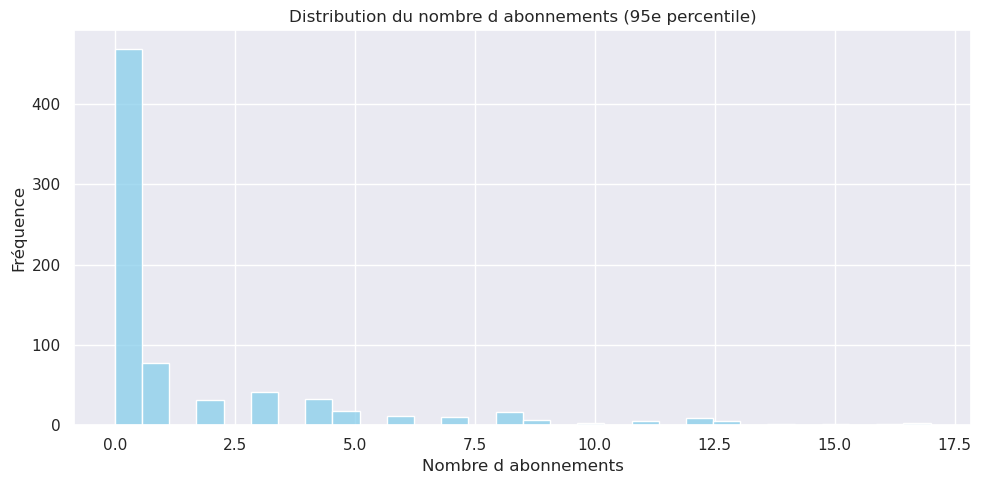

In [437]:
# Calculer le seuil comme étant le 95e percentile des données
threshold = df['following_count'].quantile(0.95)

# Filtrer les données pour inclure seulement jusqu'au 95e percentile
filtered_data = df[df['following_count'] <= threshold]['following_count']

plt.figure(figsize=(10, 5))

sns.histplot(filtered_data, kde=False, bins=30, color='skyblue')

plt.title('Distribution du nombre d abonnements (95e percentile)')
plt.xlabel('Nombre d abonnements')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


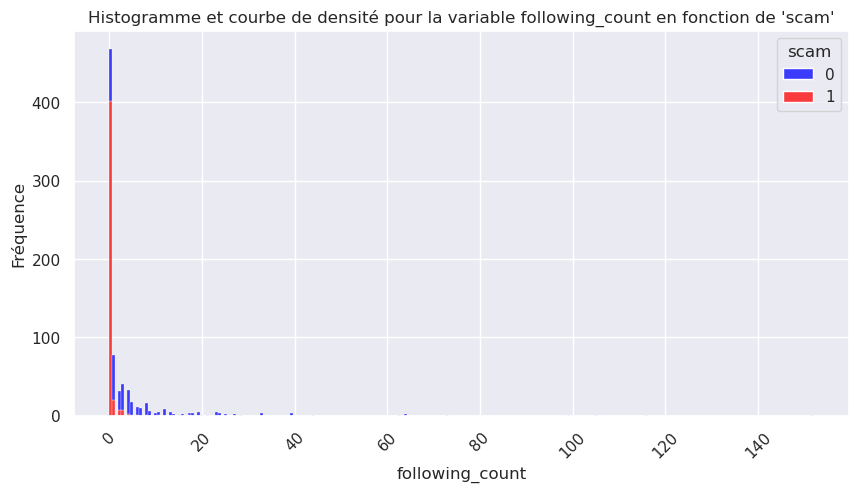

In [438]:
df_sorted = df.sort_values('following_count')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='following_count', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('following_count')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable following_count en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [439]:
stat, p = shapiro(df['following_count'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.32019519805908203
P-value : 0.0
La variable n'est probablement pas normalement distribuée


##### Other Campus Dressing

In [440]:
# type, nombres valeurs
df["other_campus_dressing"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: other_campus_dressing
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [441]:
# Taux de na
(df["other_campus_dressing"].isna().sum())/(len(df.index))


0.0

In [442]:
# Valeurs et Nombre de valeurs distinctes
df["other_campus_dressing"].unique()


array([1.        , 0.        , 0.125     , 0.16666667, 0.5       ,
       0.25      , 0.66666667, 0.09090909, 0.03389831, 0.57142857,
       0.05263158, 0.2       , 0.03125   , 0.28571429, 0.33333333,
       0.06451613, 0.0625    , 0.55555556, 0.875     , 0.14285714,
       0.03703704, 0.06666667, 0.23076923, 0.02105263, 0.3       ,
       0.015625  , 0.03571429, 0.6       , 0.11111111, 0.8       ,
       0.17647059, 0.07692308, 0.10526316, 0.05882353, 0.03333333,
       0.27272727, 0.13333333, 0.12      , 0.08333333, 0.08235294,
       0.07142857, 0.18181818, 0.04347826, 0.08695652, 0.1       ,
       0.22727273, 0.19047619, 0.24137931, 0.21052632, 0.09677419,
       0.06382979, 0.22222222, 0.04      , 0.375     , 0.26315789,
       0.03448276, 0.04651163, 0.01052632, 0.05      , 0.42857143,
       0.26666667, 0.52941176])

In [443]:
df["other_campus_dressing"].value_counts()

other_campus_dressing
0.000000    306
1.000000    260
0.500000     36
0.166667     10
0.250000      9
           ... 
0.010526      1
0.050000      1
0.428571      1
0.266667      1
0.529412      1
Name: count, Length: 62, dtype: int64

In [444]:
print("pourcentage min:",df["other_campus_dressing"].min())
# Valeur Maximale pourcentage
print("pourcentage max:",df["other_campus_dressing"].max())


pourcentage min: 0.0
pourcentage max: 1.0


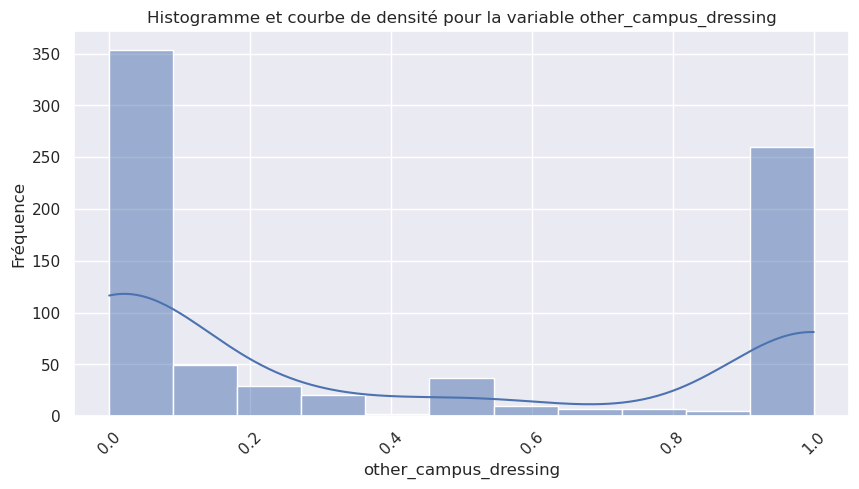

In [445]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('other_campus_dressing')
sns.histplot(df_sorted['other_campus_dressing'], kde=True)
plt.xlabel('other_campus_dressing')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable other_campus_dressing")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

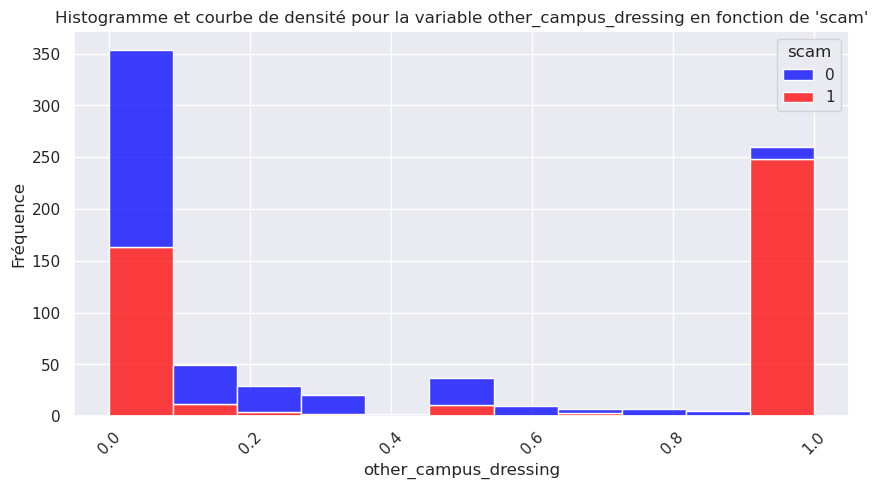

In [446]:
df_sorted = df.sort_values('other_campus_dressing')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='other_campus_dressing', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('other_campus_dressing')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable other_campus_dressing en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [447]:
stat, p = shapiro(df['other_campus_dressing'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.7272927761077881
P-value : 8.357736365342655e-34
La variable n'est probablement pas normalement distribuée


##### hype_products_dressing

In [448]:
# type, nombres valeurs
df["hype_products_dressing"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: hype_products_dressing
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [449]:
# Taux de na
(df["hype_products_dressing"].isna().sum())/(len(df.index))

0.0

In [450]:
# Valeurs et Nombre de valeurs distinctes
df["hype_products_dressing"].unique()
df["hype_products_dressing"].value_counts()

hype_products_dressing
0.000000    646
0.100000     12
0.166667     12
1.000000      9
0.111111      9
0.333333      7
0.142857      5
0.250000      5
0.500000      5
0.090909      5
0.095238      4
0.200000      4
0.010526      3
0.037037      3
0.052632      3
0.176471      3
0.193548      3
0.294118      3
0.125000      2
0.013333      2
0.583333      2
0.233333      2
0.105263      2
0.550000      2
0.080000      2
0.115385      1
0.692308      1
0.214286      1
0.041667      1
0.040000      1
0.076923      1
0.666667      1
0.032258      1
0.016129      1
0.021277      1
0.428571      1
0.027027      1
0.304348      1
0.105882      1
0.039216      1
0.047619      1
0.108696      1
0.230769      1
0.012500      1
0.021053      1
0.029412      1
0.023256      1
0.400000      1
0.055556      1
0.117647      1
Name: count, dtype: int64

In [451]:
print("pourcentage min:",df["hype_products_dressing"].min())
# Valeur Maximale pourcentage
print("pourcentage max:",df["hype_products_dressing"].max())

pourcentage min: 0.0
pourcentage max: 1.0


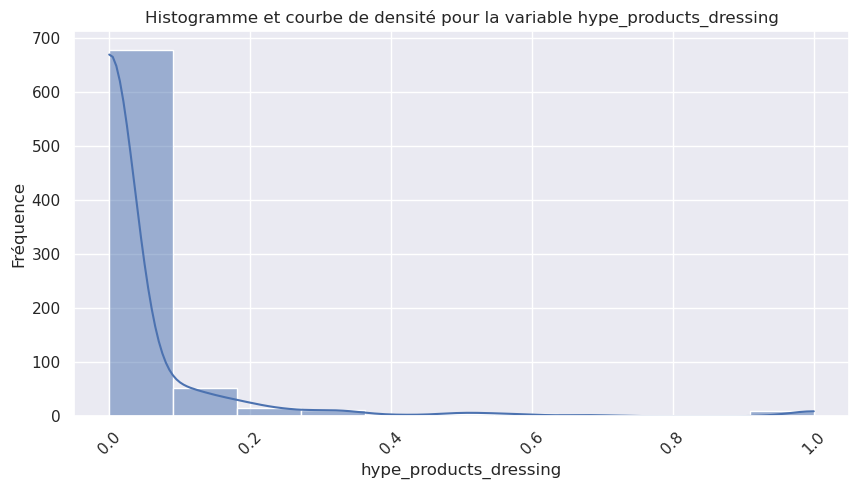

In [452]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('hype_products_dressing')
sns.histplot(df_sorted['hype_products_dressing'], kde=True)
plt.xlabel('hype_products_dressing')
plt.ylabel('Fréquence')
plt.title("Histogramme et courbe de densité pour la variable hype_products_dressing")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

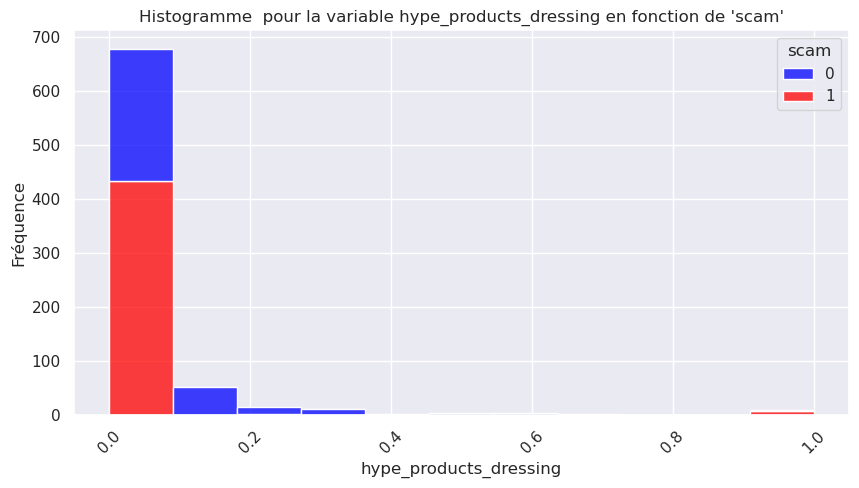

In [453]:
df_sorted = df.sort_values('hype_products_dressing')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='hype_products_dressing', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('hype_products_dressing')
plt.ylabel('Fréquence')
plt.title("Histogramme  pour la variable hype_products_dressing en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [454]:
stat, p = shapiro(df['hype_products_dressing'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.3262954354286194
P-value : 0.0
La variable n'est probablement pas normalement distribuée


##### other_campus_sell

In [455]:
# type, nombres valeurs
df["other_campus_sell"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: other_campus_sell
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [456]:
# Taux de na
(df["other_campus_sell"].isna().sum())/(len(df.index))

0.0

In [457]:
# Valeurs et Nombre de valeurs distinctes
df["other_campus_sell"].unique()
df["other_campus_sell"].value_counts()

other_campus_sell
0.000000    480
0.333333     17
0.250000     15
1.000000     15
0.500000     14
           ... 
0.106383      1
0.055556      1
0.272727      1
0.071429      1
0.102041      1
Name: count, Length: 129, dtype: int64

In [458]:
print("pourcentage min:",df["other_campus_sell"].min())
# Valeur Maximale pourcentage
print("pourcentage max:",df["other_campus_sell"].max())

pourcentage min: 0.0
pourcentage max: 1.0


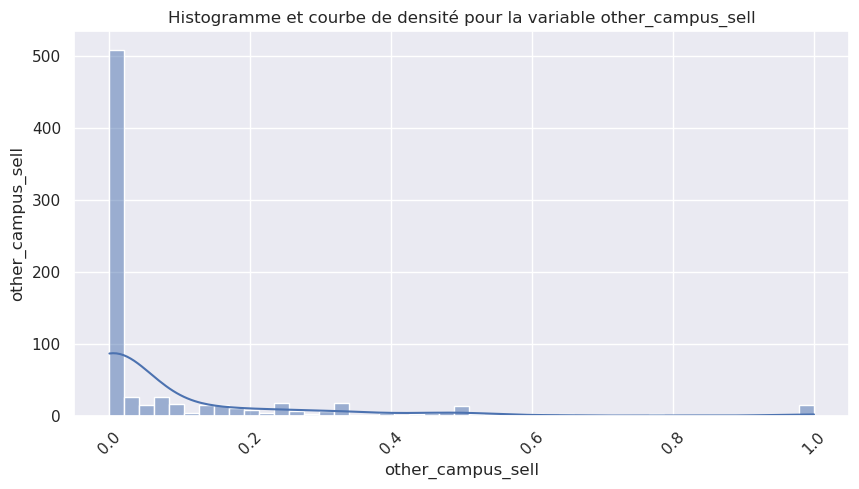

In [459]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('other_campus_sell')
sns.histplot(df_sorted['other_campus_sell'], kde=True)
plt.xlabel('other_campus_sell')
plt.ylabel('other_campus_sell')
plt.title("Histogramme et courbe de densité pour la variable other_campus_sell")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

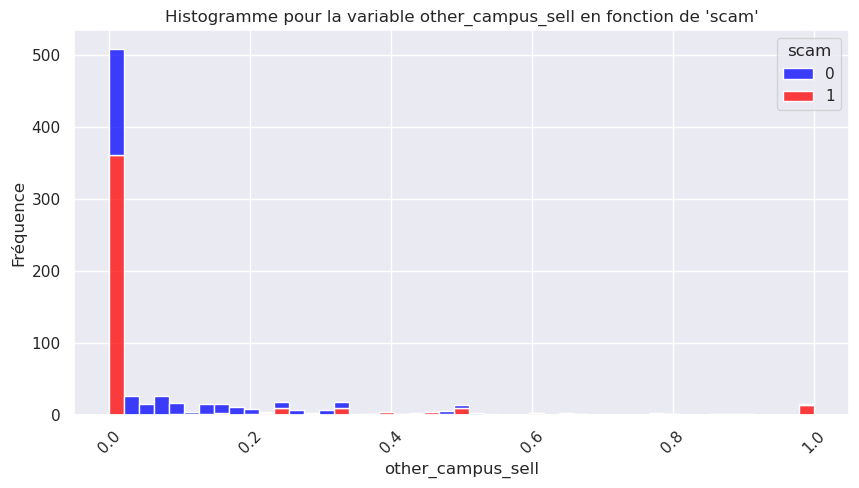

In [460]:
df_sorted = df.sort_values('other_campus_sell')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='other_campus_sell', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('other_campus_sell')
plt.ylabel('Fréquence')
plt.title("Histogramme pour la variable other_campus_sell en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [461]:
stat, p = shapiro(df['other_campus_sell'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.5622584819793701
P-value : 3.2695376029319497e-40
La variable n'est probablement pas normalement distribuée


##### hype_products_sell

In [462]:
# type, nombres valeurs
df["hype_products_sell"].info()

<class 'pandas.core.series.Series'>
Index: 780 entries, 3983113025 to 3981429264
Series name: hype_products_sell
Non-Null Count  Dtype  
--------------  -----  
780 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [463]:
# Taux de na
(df["hype_products_sell"].isna().sum())/(len(df.index))

0.0

In [464]:
# Valeurs et Nombre de valeurs distinctes
df["hype_products_sell"].unique()
df["hype_products_sell"].value_counts()

hype_products_sell
0.000000    512
0.010000     14
0.030000     10
0.200000      9
1.000000      9
           ... 
0.040816      1
0.567901      1
0.057143      1
0.028571      1
0.085366      1
Name: count, Length: 132, dtype: int64

In [465]:
print("pourcentage min:",df["hype_products_sell"].min())
# Valeur Maximale pourcentage
print("pourcentage max:",df["hype_products_sell"].max())

pourcentage min: 0.0
pourcentage max: 1.0


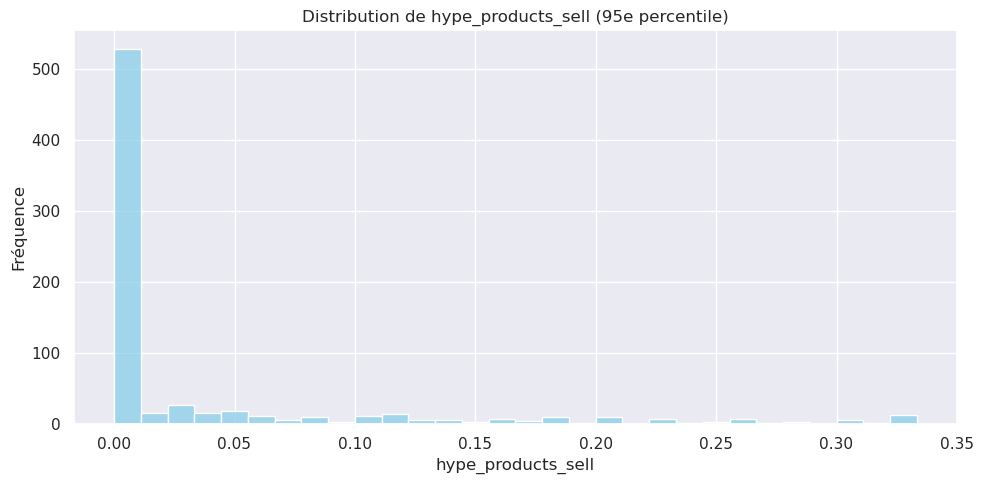

In [466]:
# Calculer le seuil comme étant le 95e percentile des données
threshold = df['hype_products_sell'].quantile(0.95)

# Filtrer les données pour inclure seulement jusqu'au 95e percentile
filtered_data = df[df['hype_products_sell'] <= threshold]['hype_products_sell']

plt.figure(figsize=(10, 5))

sns.histplot(filtered_data, kde=False, bins=30, color='skyblue')

plt.title('Distribution de hype_products_sell (95e percentile)')
plt.xlabel('hype_products_sell')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

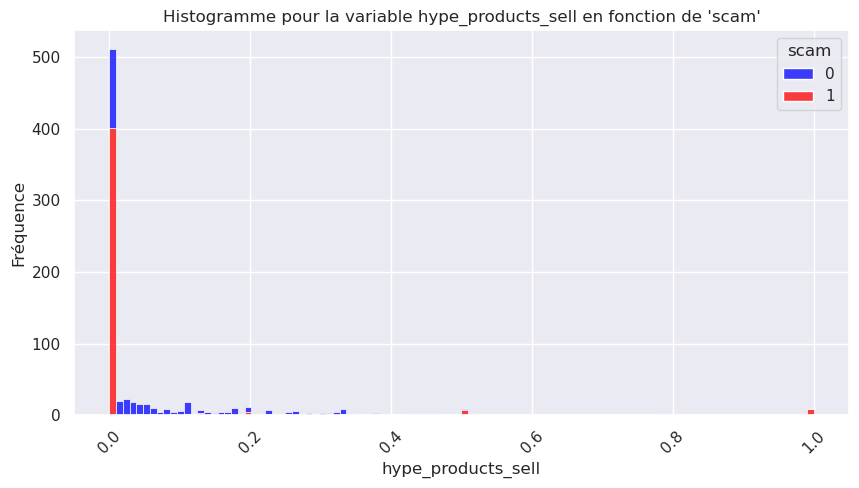

In [467]:
df_sorted = df.sort_values('hype_products_sell')
plt.figure(figsize=(10, 5))
sns.histplot(data=df_sorted, x='hype_products_sell', hue='scam', palette={0: 'blue', 1: 'red'}, multiple='stack')
plt.xlabel('hype_products_sell')
plt.ylabel('Fréquence')
plt.title("Histogramme pour la variable hype_products_sell en fonction de 'scam'")
plt.xticks(rotation=45)
plt.show()

In [468]:
stat, p = shapiro(df['hype_products_sell'])

print('Statistique de test :', stat)
print('P-value :', p)

alpha = 0.05
if p > alpha:
    print('La variable est probablement normalement distribuée')
else:
    print('La variable n\'est probablement pas normalement distribuée')

Statistique de test : 0.4689226746559143
P-value : 5.3809861030072976e-43
La variable n'est probablement pas normalement distribuée
